Домашнее задание по ММО
Выполнил: Маматкулов Уткурбек Бурханович
группа: ИУ5-21М

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.impute import MissingIndicator
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
%matplotlib inline
sns.set(style="ticks")

In [ ]:
data_loaded = pd.read_csv('train.csv', sep=",")

In [ ]:
data_loaded.head()

,id,Birth date,Native city,Gender,Wave id,Level,Heard about school from,Life status,day_00,day_01,...,rush_01,rush_02,exam_00,exam_01,exam_02,exam_final,Contract termination date,Memory entrance game,Logic entrance game,contract_status
0,129212391,1990-01-18,Пермь,male,3,7.463235,google_ads,work,5,NaN,...,0.0,0.0,75.0,43.0,100.0,44.0,NaN,9,11,1
1,566688420,1996-07-31,Волгоград,female,1,8.785714,NaN,NaN,0,NaN,...,0.0,0.0,0.0,16.0,22.0,22.0,NaN,7,10,1
2,242300495,1992-06-27,Новосибирск,female,2,6.775000,other,work,0,NaN,...,NaN,NaN,0.0,0.0,16.0,27.0,NaN,7,11,1
3,715424753,1996-06-15,Тула,female,1,8.146104,NaN,NaN,5,0.0,...,0.0,0.0,0.0,0.0,27.0,27.0,NaN,9,6,1
4,382884118,1968-07-18,Голицыно,male,3,4.272727,other,other,0,0.0,...,0.0,0.0,80.0,38.0,0.0,45.0,NaN,7,12,1


In [ ]:
data_loaded = data_loaded.drop(['Contract termination date', 'Birth date'], axis=1)
data_loaded.head()

,id,Native city,Gender,Wave id,Level,Heard about school from,Life status,day_00,day_01,day_02,...,rush_00,rush_01,rush_02,exam_00,exam_01,exam_02,exam_final,Memory entrance game,Logic entrance game,contract_status
0,129212391,Пермь,male,3,7.463235,google_ads,work,5,NaN,0.0,...,0.0,0.0,0.0,75.0,43.0,100.0,44.0,9,11,1
1,566688420,Волгоград,female,1,8.785714,NaN,NaN,0,NaN,10.0,...,110.0,0.0,0.0,0.0,16.0,22.0,22.0,7,10,1
2,242300495,Новосибирск,female,2,6.775000,other,work,0,NaN,20.0,...,NaN,NaN,NaN,0.0,0.0,16.0,27.0,7,11,1
3,715424753,Тула,female,1,8.146104,NaN,NaN,5,0.0,35.0,...,0.0,0.0,0.0,0.0,0.0,27.0,27.0,9,6,1
4,382884118,Голицыно,male,3,4.272727,other,other,0,0.0,NaN,...,120.0,0.0,0.0,80.0,38.0,0.0,45.0,7,12,1


In [ ]:
data_loaded.shape

(1060, 34)

In [ ]:
def check_null_values(data):
    return list(zip([i for i in data.columns], zip(
    #типы колонок
    [str(i) for i in data.dtypes],
    #проверка, есть ли пропущенные значения
    [i for i in data.isnull().sum()])))

In [ ]:
data_features = check_null_values(data_loaded)
data_features

[('id', ('int64', 0)),
 ('Native city', ('object', 13)),
 ('Gender', ('object', 0)),
 ('Wave id', ('int64', 0)),
 ('Level', ('float64', 0)),
 ('Heard about school from', ('object', 407)),
 ('Life status', ('object', 405)),
 ('day_00', ('int64', 0)),
 ('day_01', ('float64', 414)),
 ('day_02', ('float64', 16)),
 ('day_03', ('float64', 15)),
 ('day_04', ('float64', 23)),
 ('day_05', ('float64', 4)),
 ('day_06', ('float64', 12)),
 ('day_07', ('float64', 14)),
 ('day_08', ('float64', 15)),
 ('day_09', ('float64', 13)),
 ('day_10', ('float64', 32)),
 ('day_11', ('float64', 13)),
 ('day_12', ('float64', 10)),
 ('day_13', ('float64', 31)),
 ('evalexpr', ('float64', 57)),
 ('match_n_match', ('float64', 109)),
 ('bsq', ('float64', 33)),
 ('rush_00', ('float64', 64)),
 ('rush_01', ('float64', 116)),
 ('rush_02', ('float64', 158)),
 ('exam_00', ('float64', 13)),
 ('exam_01', ('float64', 19)),
 ('exam_02', ('float64', 13)),
 ('exam_final', ('float64', 4)),
 ('Memory entrance game', ('int64', 0)),
 

# Устранение пропусков в данных

### Заполнение значений для одного признака 

In [ ]:
def impute_column(dataset, column, strategy_param, fill_value_param=None):
    """
    Заполнение пропусков в одном признаке
    """
    temp_data = dataset[[column]].values
    size = temp_data.shape[0]
    
    indicator = MissingIndicator()
    mask_missing_values_only = indicator.fit_transform(temp_data)
    
    imputer = SimpleImputer(strategy=strategy_param, 
                            fill_value=fill_value_param)
    all_data = imputer.fit_transform(temp_data)
    
    missed_data = temp_data[mask_missing_values_only]
    filled_data = all_data[mask_missing_values_only]
    
    return all_data.reshape((size,)), filled_data, missed_data

In [ ]:
data_na_replaced = data_loaded.copy()
for column in data_loaded.columns:
    data_na_replaced[column], filled_data, missed_data = impute_column(data_loaded, column, 'most_frequent')

In [ ]:
check_null_values(data_na_replaced)

[('id', ('int64', 0)),
 ('Native city', ('object', 0)),
 ('Gender', ('object', 0)),
 ('Wave id', ('int64', 0)),
 ('Level', ('float64', 0)),
 ('Heard about school from', ('object', 0)),
 ('Life status', ('object', 0)),
 ('day_00', ('int64', 0)),
 ('day_01', ('float64', 0)),
 ('day_02', ('float64', 0)),
 ('day_03', ('float64', 0)),
 ('day_04', ('float64', 0)),
 ('day_05', ('float64', 0)),
 ('day_06', ('float64', 0)),
 ('day_07', ('float64', 0)),
 ('day_08', ('float64', 0)),
 ('day_09', ('float64', 0)),
 ('day_10', ('float64', 0)),
 ('day_11', ('float64', 0)),
 ('day_12', ('float64', 0)),
 ('day_13', ('float64', 0)),
 ('evalexpr', ('float64', 0)),
 ('match_n_match', ('float64', 0)),
 ('bsq', ('float64', 0)),
 ('rush_00', ('float64', 0)),
 ('rush_01', ('float64', 0)),
 ('rush_02', ('float64', 0)),
 ('exam_00', ('float64', 0)),
 ('exam_01', ('float64', 0)),
 ('exam_02', ('float64', 0)),
 ('exam_final', ('float64', 0)),
 ('Memory entrance game', ('int64', 0)),
 ('Logic entrance game', ('int6

In [ ]:
data_na_replaced

,id,Native city,Gender,Wave id,Level,Heard about school from,Life status,day_00,day_01,day_02,...,rush_00,rush_01,rush_02,exam_00,exam_01,exam_02,exam_final,Memory entrance game,Logic entrance game,contract_status
0,129212391,Пермь,male,3,7.463235,google_ads,work,5,0.0,0.0,...,0.0,0.0,0.0,75.0,43.0,100.0,44.0,9,11,1
1,566688420,Волгоград,female,1,8.785714,other,study,0,0.0,10.0,...,110.0,0.0,0.0,0.0,16.0,22.0,22.0,7,10,1
2,242300495,Новосибирск,female,2,6.775000,other,work,0,0.0,20.0,...,0.0,0.0,0.0,0.0,0.0,16.0,27.0,7,11,1
3,715424753,Тула,female,1,8.146104,other,study,5,0.0,35.0,...,0.0,0.0,0.0,0.0,0.0,27.0,27.0,9,6,1
4,382884118,Голицыно,male,3,4.272727,other,other,0,0.0,0.0,...,120.0,0.0,0.0,80.0,38.0,0.0,45.0,7,12,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1055,1913448776,Тверь,male,3,4.149733,vk_ads,study,10,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,22.0,18.0,7,11,1
1056,765964407,"Р-Н ВОСКРЕСЕНСКИЙ, НП СЛОБОДКА АЛЕШИНО",male,3,4.320856,from_friends,study,5,0.0,10.0,...,120.0,0.0,0.0,20.0,22.0,32.0,27.0,11,12,1
1057,1546808331,Москва,male,2,6.675000,from_friends,study,30,30.0,10.0,...,0.0,96.0,0.0,100.0,48.0,80.0,45.0,8,16,1
1058,1918072182,Москва,male,3,6.483333,other,study,50,0.0,80.0,...,105.0,0.0,0.0,0.0,64.0,64.0,45.0,8,12,1


In [ ]:
def research_impute_numeric_column(dataset, num_column, const_value=None):
    strategy_params = ['mean', 'median', 'most_frequent', 'constant']
    strategy_params_names = ['Среднее', 'Медиана', 'Мода']
    strategy_params_names.append('Константа = ' + str(const_value))
    
    original_temp_data = dataset[[num_column]].values
    size = original_temp_data.shape[0]
    original_data = original_temp_data.reshape((size,))
    
    new_df = pd.DataFrame({'Исходные данные':original_data})
       
    for i in range(len(strategy_params)):
        strategy = strategy_params[i]
        col_name = strategy_params_names[i]
        if (strategy!='constant') or (strategy == 'constant' and const_value!=None):
            if strategy == 'constant':
                temp_data, _, _ = impute_column(dataset, num_column, strategy, fill_value_param=const_value)
            else:
                temp_data, _, _ = impute_column(dataset, num_column, strategy)
            new_df[col_name] = temp_data
        
    sns.kdeplot(data=new_df)

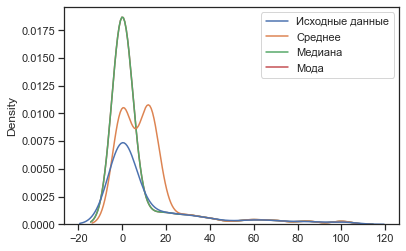

In [ ]:
#Сравнение заполнения различными показателями распределения
research_impute_numeric_column(data_loaded, 'day_01')

# Кодирование категориальных признаков

### 1. Label Encoding 

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
data_encoded = data_na_replaced.copy()
data_encoded

,id,Native city,Gender,Wave id,Level,Heard about school from,Life status,day_00,day_01,day_02,...,rush_00,rush_01,rush_02,exam_00,exam_01,exam_02,exam_final,Memory entrance game,Logic entrance game,contract_status
0,129212391,Пермь,male,3,7.463235,google_ads,work,5,0.0,0.0,...,0.0,0.0,0.0,75.0,43.0,100.0,44.0,9,11,1
1,566688420,Волгоград,female,1,8.785714,other,study,0,0.0,10.0,...,110.0,0.0,0.0,0.0,16.0,22.0,22.0,7,10,1
2,242300495,Новосибирск,female,2,6.775000,other,work,0,0.0,20.0,...,0.0,0.0,0.0,0.0,0.0,16.0,27.0,7,11,1
3,715424753,Тула,female,1,8.146104,other,study,5,0.0,35.0,...,0.0,0.0,0.0,0.0,0.0,27.0,27.0,9,6,1
4,382884118,Голицыно,male,3,4.272727,other,other,0,0.0,0.0,...,120.0,0.0,0.0,80.0,38.0,0.0,45.0,7,12,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1055,1913448776,Тверь,male,3,4.149733,vk_ads,study,10,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,22.0,18.0,7,11,1
1056,765964407,"Р-Н ВОСКРЕСЕНСКИЙ, НП СЛОБОДКА АЛЕШИНО",male,3,4.320856,from_friends,study,5,0.0,10.0,...,120.0,0.0,0.0,20.0,22.0,32.0,27.0,11,12,1
1057,1546808331,Москва,male,2,6.675000,from_friends,study,30,30.0,10.0,...,0.0,96.0,0.0,100.0,48.0,80.0,45.0,8,16,1
1058,1918072182,Москва,male,3,6.483333,other,study,50,0.0,80.0,...,105.0,0.0,0.0,0.0,64.0,64.0,45.0,8,12,1


In [ ]:
#le = LabelEncoder()
category_columns = ['Native city', 'Gender', 'Heard about school from', 'Life status']
for col in category_columns:
    le = LabelEncoder()
    data_encoded[col] = le.fit_transform(data_encoded[col])
data_encoded

,id,Native city,Gender,Wave id,Level,Heard about school from,Life status,day_00,day_01,day_02,...,rush_00,rush_01,rush_02,exam_00,exam_01,exam_02,exam_final,Memory entrance game,Logic entrance game,contract_status
0,129212391,159,1,3,7.463235,5,2,5,0.0,0.0,...,0.0,0.0,0.0,75.0,43.0,100.0,44.0,9,11,1
1,566688420,41,0,1,8.785714,6,1,0,0.0,10.0,...,110.0,0.0,0.0,0.0,16.0,22.0,22.0,7,10,1
2,242300495,143,0,2,6.775000,6,2,0,0.0,20.0,...,0.0,0.0,0.0,0.0,0.0,16.0,27.0,7,11,1
3,715424753,214,0,1,8.146104,6,1,5,0.0,35.0,...,0.0,0.0,0.0,0.0,0.0,27.0,27.0,9,6,1
4,382884118,48,1,3,4.272727,6,0,0,0.0,0.0,...,120.0,0.0,0.0,80.0,38.0,0.0,45.0,7,12,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1055,1913448776,208,1,3,4.149733,7,1,10,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,22.0,18.0,7,11,1
1056,765964407,168,1,3,4.320856,2,1,5,0.0,10.0,...,120.0,0.0,0.0,20.0,22.0,32.0,27.0,11,12,1
1057,1546808331,120,1,2,6.675000,2,1,30,30.0,10.0,...,0.0,96.0,0.0,100.0,48.0,80.0,45.0,8,16,1
1058,1918072182,119,1,3,6.483333,6,1,50,0.0,80.0,...,105.0,0.0,0.0,0.0,64.0,64.0,45.0,8,12,1


# Нормализация числовых признаков

In [ ]:
import scipy.stats as stats

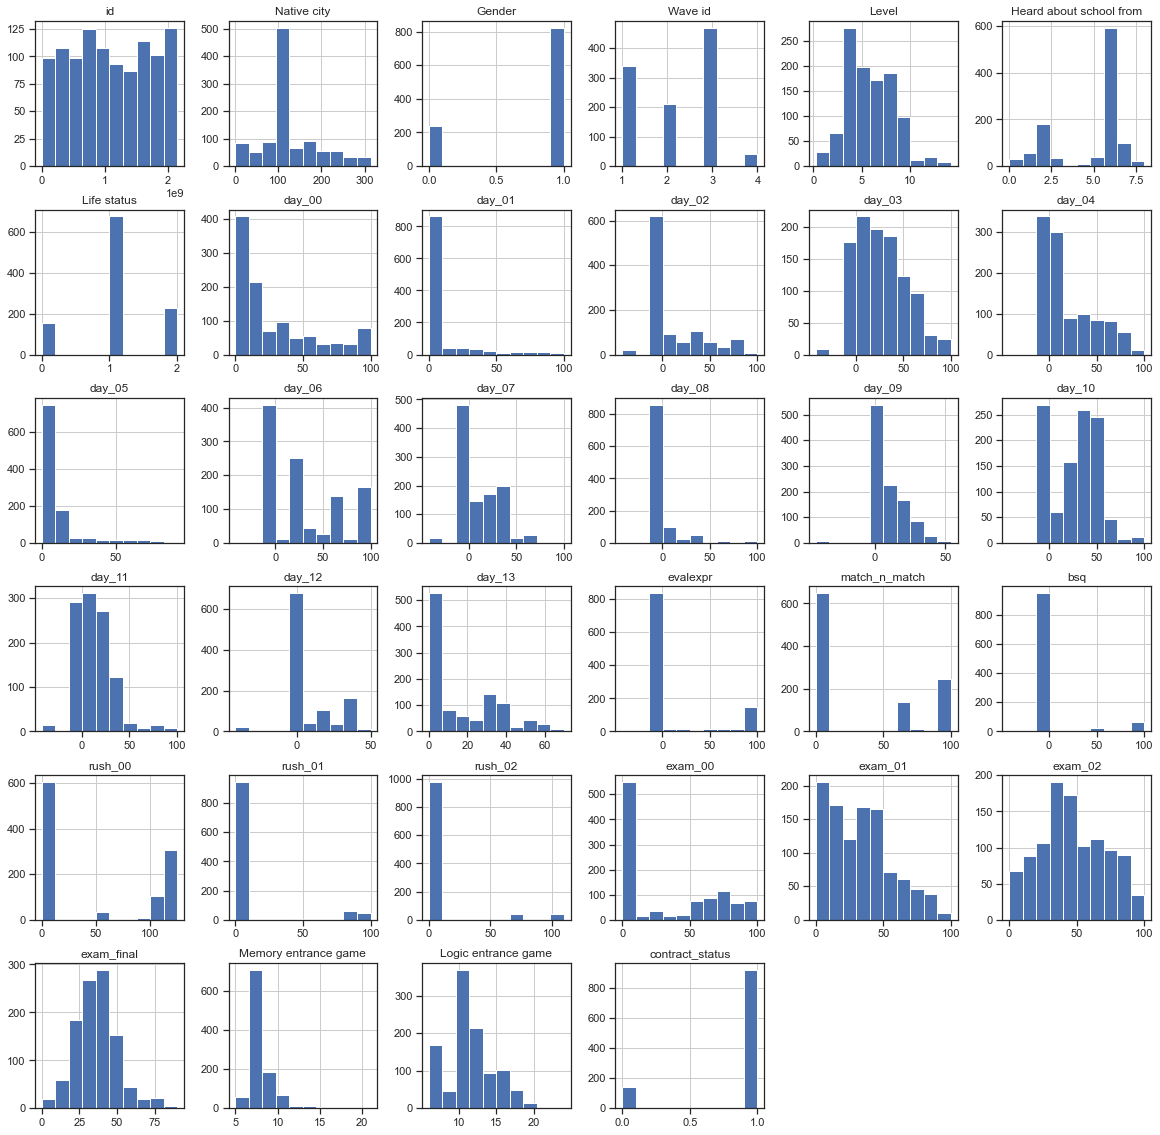

In [ ]:
data_encoded.hist(figsize=(20, 20))
plt.show()

In [ ]:
def diagnostic_plots(df, variable):
    plt.figure(figsize=(15,6))
    # гистограмма
    plt.subplot(1, 2, 1)
    df[variable].hist(bins=30)
    ## Q-Q plot
    plt.subplot(1, 2, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)
    plt.show()

In [ ]:
data_normalized = data_encoded.copy()
# Необходимо преобразовать данные к действительному типу
for col in data_normalized.columns:
    data_normalized[col] = data_normalized[col].astype('float')
    data_normalized[col], param = stats.yeojohnson(data_normalized[col]) 

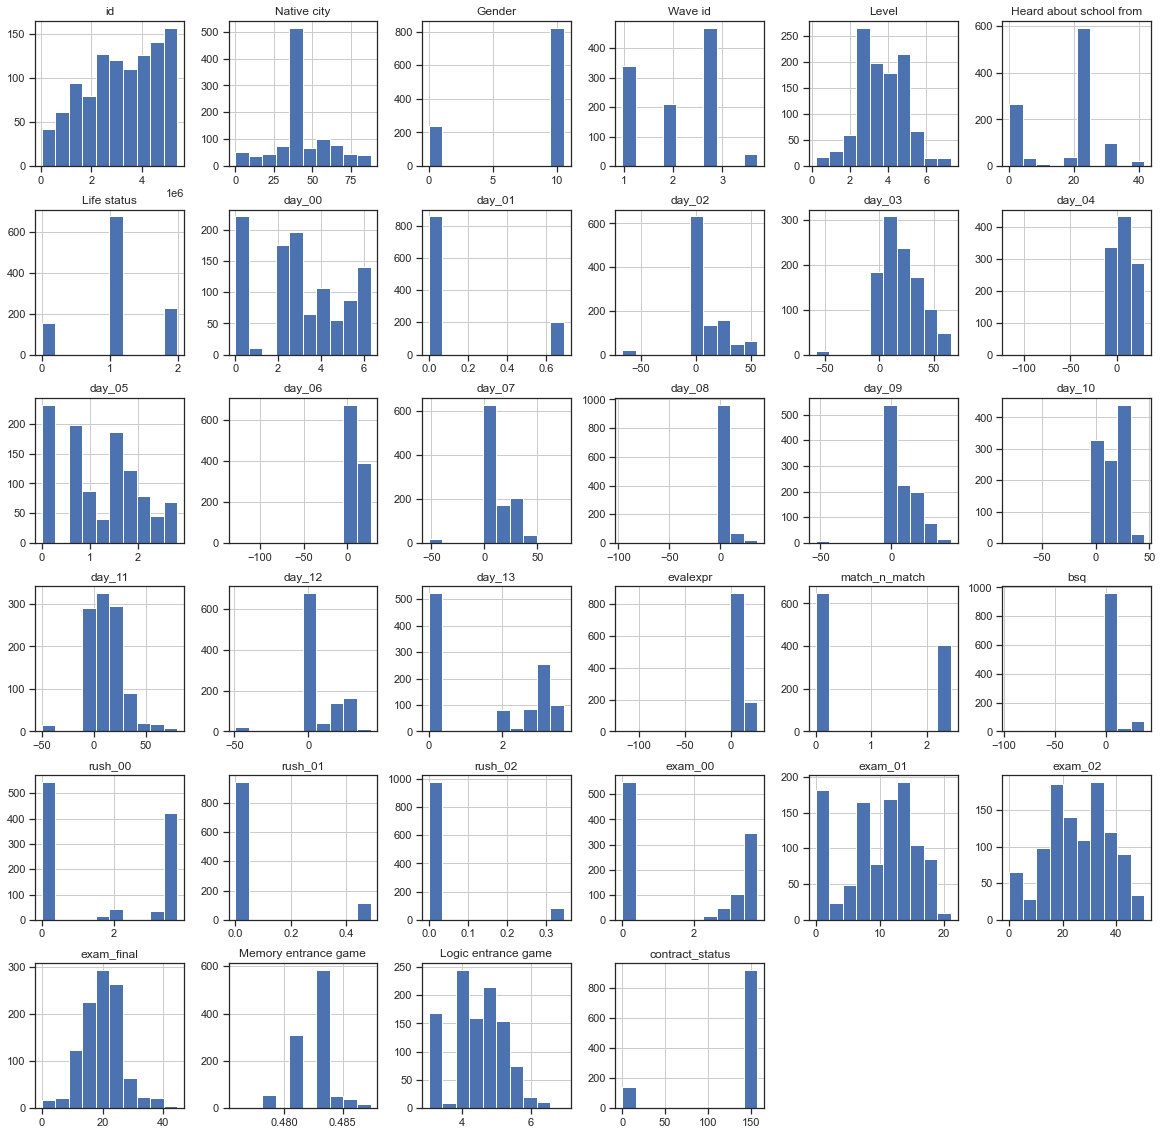

In [ ]:
data_normalized.hist(figsize=(20,20))
plt.show()

In [ ]:
data_normalized

,id,Native city,Gender,Wave id,Level,Heard about school from,Life status,day_00,day_01,day_02,...,rush_00,rush_01,rush_02,exam_00,exam_01,exam_02,exam_final,Memory entrance game,Logic entrance game,contract_status
0,7.440813e+05,53.142349,10.509352,2.817426,4.535441,18.008774,1.988700,2.015112,-0.000000,0.000000,...,-0.000000,-0.000000,-0.0,3.581089,12.683845,50.483923,24.872179,0.483893,4.446321,157.438327
1,2.110445e+06,19.312977,0.000000,0.971741,5.125305,24.773476,0.996627,0.000000,-0.000000,7.721259,...,3.678351,-0.000000,-0.0,-0.000000,6.792565,14.386547,14.040287,0.481360,4.197516,157.438327
2,1.159231e+06,49.136182,0.000000,1.906271,4.215184,24.773476,1.988700,0.000000,-0.000000,14.142707,...,-0.000000,-0.000000,-0.0,-0.000000,0.000000,10.997127,16.639080,0.481360,4.446321,157.438327
3,2.487437e+06,66.153741,0.000000,0.971741,4.843920,24.773476,0.996627,2.015112,-0.000000,22.912283,...,-0.000000,-0.000000,-0.0,-0.000000,0.000000,17.081711,16.639080,0.483893,3.044856,157.438327
4,1.600657e+06,21.757480,10.509352,2.817426,2.950189,24.773476,0.000000,0.000000,-0.000000,0.000000,...,3.729576,-0.000000,-0.0,3.623975,11.756081,0.000000,25.334339,0.481360,4.683573,157.438327
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1055,4.977851e+06,64.783291,10.509352,2.817426,2.882900,32.602702,0.996627,2.808948,-0.000000,0.000000,...,-0.000000,-0.000000,-0.0,-0.000000,0.000000,14.386547,11.878068,0.481360,4.446321,157.438327
1056,2.610098e+06,55.346994,10.509352,2.817426,2.976363,4.063310,0.996627,2.015112,-0.000000,7.721259,...,3.729576,-0.000000,-0.0,2.660155,8.344540,19.686011,16.639080,0.485255,4.683573,157.438327
1057,4.284471e+06,43.153499,10.509352,1.906271,4.167804,4.063310,0.996627,4.317815,0.686664,7.721259,...,-0.000000,0.487834,-0.0,3.770604,13.565017,42.027245,25.334339,0.482840,5.541040,157.438327
1058,4.986330e+06,42.886603,10.509352,2.817426,4.076357,24.773476,0.996627,5.117555,-0.000000,46.408508,...,3.650781,-0.000000,-0.0,-0.000000,16.141520,34.971162,25.334339,0.482840,4.683573,157.438327


# Масштабирование признаков

### На основе Z-оценки

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MaxAbsScaler

In [ ]:
data_scaled = data_normalized.copy()
data_scaled.describe()

,id,Native city,Gender,Wave id,Level,Heard about school from,Life status,day_00,day_01,day_02,...,rush_00,rush_01,rush_02,exam_00,exam_01,exam_02,exam_final,Memory entrance game,Logic entrance game,contract_status
count,1.060000e+03,1060.000000,1060.000000,1060.000000,1060.000000,1060.000000,1060.000000,1060.000000,1060.000000,1060.000000,...,1060.000000,1060.000000,1060.000000,1060.000000,1060.000000,1060.000000,1060.000000,1060.000000,1060.000000,1060.000000
mean,3.192016e+06,44.400394,8.149705,2.078666,3.709458,19.450846,1.064283,3.018736,0.130852,8.470651,...,1.688744,0.054292,0.026761,1.641660,9.537473,26.012549,19.927073,0.482646,4.497452,136.347532
std,1.443290e+06,17.464263,4.387321,0.860580,1.184935,10.712010,0.593881,2.034873,0.269017,18.324733,...,1.781118,0.153470,0.092465,1.720657,5.652528,11.996502,6.878448,0.001505,0.745809,53.650660
min,4.089877e+04,0.000000,0.000000,0.971741,0.213095,0.000000,0.000000,0.000000,-0.000000,-66.978744,...,-0.000000,-0.000000,-0.000000,-0.000000,0.000000,0.000000,0.000000,0.475820,3.044856,0.000000
25%,2.130037e+06,42.283774,10.509352,0.971741,2.897578,4.063310,0.996627,2.015112,-0.000000,0.000000,...,-0.000000,-0.000000,-0.000000,-0.000000,6.792565,19.686011,16.639080,0.481360,4.197516,157.438327
50%,3.280196e+06,42.886603,10.509352,1.906271,3.577479,24.773476,0.996627,2.808948,-0.000000,0.000000,...,-0.000000,-0.000000,-0.000000,-0.000000,10.568402,25.653616,20.853172,0.482840,4.446321,157.438327
75%,4.449189e+06,52.957067,10.509352,2.817426,4.576638,24.773476,0.996627,4.760633,0.000000,20.069916,...,3.729576,0.000000,0.000000,3.485244,13.565017,34.971162,23.002140,0.483893,4.910641,157.438327
max,5.393494e+06,87.677070,10.509352,3.711586,7.280049,41.499496,1.988700,6.302049,0.690611,56.091346,...,3.753455,0.487837,0.345940,3.770604,21.047689,50.483923,44.567514,0.487394,6.960828,157.438327


In [ ]:
X_ALL = data_scaled.drop('contract_status', axis=1)
X_ALL

,id,Native city,Gender,Wave id,Level,Heard about school from,Life status,day_00,day_01,day_02,...,bsq,rush_00,rush_01,rush_02,exam_00,exam_01,exam_02,exam_final,Memory entrance game,Logic entrance game
0,7.440813e+05,53.142349,10.509352,2.817426,4.535441,18.008774,1.988700,2.015112,-0.000000,0.000000,...,0.0,-0.000000,-0.000000,-0.0,3.581089,12.683845,50.483923,24.872179,0.483893,4.446321
1,2.110445e+06,19.312977,0.000000,0.971741,5.125305,24.773476,0.996627,0.000000,-0.000000,7.721259,...,0.0,3.678351,-0.000000,-0.0,-0.000000,6.792565,14.386547,14.040287,0.481360,4.197516
2,1.159231e+06,49.136182,0.000000,1.906271,4.215184,24.773476,1.988700,0.000000,-0.000000,14.142707,...,0.0,-0.000000,-0.000000,-0.0,-0.000000,0.000000,10.997127,16.639080,0.481360,4.446321
3,2.487437e+06,66.153741,0.000000,0.971741,4.843920,24.773476,0.996627,2.015112,-0.000000,22.912283,...,0.0,-0.000000,-0.000000,-0.0,-0.000000,0.000000,17.081711,16.639080,0.483893,3.044856
4,1.600657e+06,21.757480,10.509352,2.817426,2.950189,24.773476,0.000000,0.000000,-0.000000,0.000000,...,0.0,3.729576,-0.000000,-0.0,3.623975,11.756081,0.000000,25.334339,0.481360,4.683573
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1055,4.977851e+06,64.783291,10.509352,2.817426,2.882900,32.602702,0.996627,2.808948,-0.000000,0.000000,...,0.0,-0.000000,-0.000000,-0.0,-0.000000,0.000000,14.386547,11.878068,0.481360,4.446321
1056,2.610098e+06,55.346994,10.509352,2.817426,2.976363,4.063310,0.996627,2.015112,-0.000000,7.721259,...,0.0,3.729576,-0.000000,-0.0,2.660155,8.344540,19.686011,16.639080,0.485255,4.683573
1057,4.284471e+06,43.153499,10.509352,1.906271,4.167804,4.063310,0.996627,4.317815,0.686664,7.721259,...,0.0,-0.000000,0.487834,-0.0,3.770604,13.565017,42.027245,25.334339,0.482840,5.541040
1058,4.986330e+06,42.886603,10.509352,2.817426,4.076357,24.773476,0.996627,5.117555,-0.000000,46.408508,...,0.0,3.650781,-0.000000,-0.0,-0.000000,16.141520,34.971162,25.334339,0.482840,4.683573


In [ ]:
# Функция восстановления датафрейма на основе масштабированных данных 
def arr_to_df(arr_scaled):
    res = pd.DataFrame(arr_scaled, columns=X_ALL.columns)
    return res

In [ ]:
# Разделим выборку на обучающую и тестовую
X_train, X_test, y_train, y_test = train_test_split(X_ALL, data_scaled['contract_status'],
                                                    test_size=0.2,
                                                    random_state=1)
# Преобразуем массивы в DataFrame
X_train_df = arr_to_df(X_train)
X_test_df = arr_to_df(X_test)

X_train_df.shape, X_test_df.shape

((848, 33), (212, 33))

In [ ]:
# Обучаем StandardScaler на всей выборке и масштабируем
cs11 = StandardScaler()
data_cs11_scaled_temp = cs11.fit_transform(X_ALL)
# формируем DataFrame на основе массива
data_cs11_scaled =  arr_to_df(data_cs11_scaled_temp)
data_cs11_scaled

,id,Native city,Gender,Wave id,Level,Heard about school from,Life status,day_00,day_01,day_02,...,bsq,rush_00,rush_01,rush_02,exam_00,exam_01,exam_02,exam_final,Memory entrance game,Logic entrance game
0,-1.696880,0.500799,0.538087,0.858850,0.697399,-0.134685,1.557304,-0.493445,-0.486639,-0.462471,...,-0.159063,-0.948585,-0.353928,-0.289559,1.127676,0.556894,2.040839,0.719267,0.828872,-0.068591
1,-0.749732,-1.437178,-1.858435,-1.286862,1.195437,0.497119,-0.113976,-1.484201,-0.486639,-0.040914,...,-0.159063,1.117583,-0.353928,-0.289559,-0.954539,-0.485836,-0.969573,-0.856234,-0.854255,-0.402352
2,-1.409103,0.271298,-1.858435,-0.200419,0.426997,0.497119,1.557304,-1.484201,-0.486639,0.309676,...,-0.159063,-0.948585,-0.353928,-0.289559,-0.954539,-1.688090,-1.252241,-0.478239,-0.854255,-0.068591
3,-0.488406,1.246180,-1.858435,-1.286862,0.957856,0.497119,-0.113976,-0.493445,-0.486639,0.788467,...,-0.159063,-0.948585,-0.353928,-0.289559,-0.954539,-1.688090,-0.744805,-0.478239,0.828872,-1.948598
4,-1.103112,-1.297140,0.538087,0.858850,-0.641071,0.497119,-1.792927,-1.484201,-0.486639,-0.462471,...,-0.159063,1.146357,-0.353928,-0.289559,1.152612,0.392684,-2.169368,0.786488,-0.854255,0.249673
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1055,1.237920,1.167671,0.538087,0.858850,-0.697885,1.228347,-0.113976,-0.103145,-0.486639,-0.462471,...,-0.159063,-0.948585,-0.353928,-0.289559,-0.954539,-1.688090,-0.969573,-1.170730,-0.854255,-0.068591
1056,-0.403379,0.627096,0.538087,0.858850,-0.618971,-1.437153,-0.113976,-0.493445,-0.486639,-0.040914,...,-0.159063,1.146357,-0.353928,-0.289559,0.592201,-0.211144,-0.527614,-0.478239,1.734175,0.249673
1057,0.757277,-0.071431,0.538087,-0.200419,0.386993,-1.437153,-0.113976,0.638709,2.067061,-0.040914,...,-0.159063,-0.948585,2.826269,-0.289559,1.237869,0.712857,1.335577,0.786488,0.129195,1.399929
1058,1.243798,-0.086720,0.538087,0.858850,0.309782,0.497119,-0.113976,1.031912,-0.486639,2.071286,...,-0.159063,1.102097,-0.353928,-0.289559,-0.954539,1.168887,0.747121,0.786488,0.129195,0.249673


In [ ]:
# Построение плотности распределения
def draw_kde(col_list, df1, df2, label1, label2):
    fig, (ax1, ax2) = plt.subplots(
        ncols=2, figsize=(12, 5))
    # первый график
    ax1.set_title(label1)
    sns.kdeplot(data=df1[col_list], ax=ax1)
    # второй график
    ax2.set_title(label2)
    sns.kdeplot(data=df2[col_list], ax=ax2)
    plt.show()

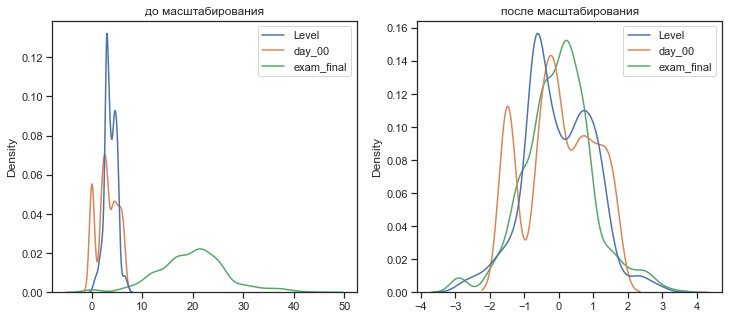

In [ ]:
draw_kde(['Level', 'day_00', 'exam_final'], data_scaled, data_cs11_scaled, 'до масштабирования', 'после масштабирования')

# Обработка выбросов

In [ ]:
def diagnostic_plots(df, variable, title):
    fig, ax = plt.subplots(figsize=(10,7))
    # гистограмма
    plt.subplot(2, 2, 1)
    df[variable].hist(bins=30)
    ## Q-Q plot
    plt.subplot(2, 2, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)
    # ящик с усами
    plt.subplot(2, 2, 3)
    sns.violinplot(x=df[variable])    
    # ящик с усами
    plt.subplot(2, 2, 4)
    sns.boxplot(x=df[variable])  
    fig.suptitle(title)
    plt.show()

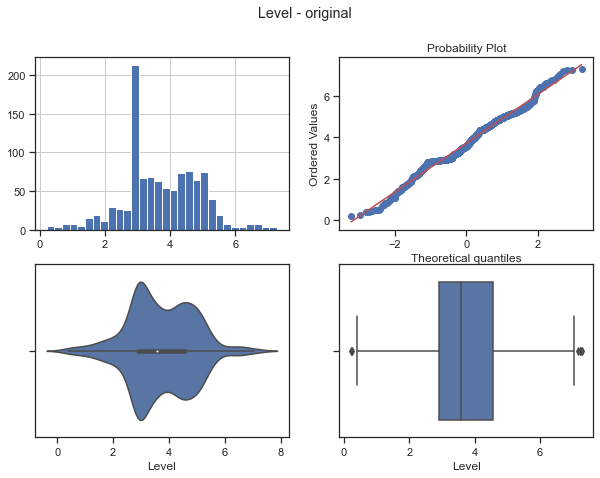

In [ ]:
diagnostic_plots(data_scaled, 'Level', 'Level - original')

### Обнаружение выбросов 

In [ ]:
# Тип вычисления верхней и нижней границы выбросов
from enum import Enum
class OutlierBoundaryType(Enum):
    #SIGMA = 1
    QUANTILE = 2
    #IRQ = 3

In [ ]:
# Функция вычисления верхней и нижней границы выбросов
def get_outlier_boundaries(df, col, outlier_boundary_type: OutlierBoundaryType):
    #if outlier_boundary_type == OutlierBoundaryType.SIGMA:
    #   K1 = 3
    #    lower_boundary = df[col].mean() - (K1 * df[col].std())
    #    upper_boundary = df[col].mean() + (K1 * df[col].std())

    #elif outlier_boundary_type == OutlierBoundaryType.QUANTILE:
    lower_boundary = df[col].quantile(0.05)
    upper_boundary = df[col].quantile(0.95)

    #elif outlier_boundary_type == OutlierBoundaryType.IRQ:
    #    K2 = 1.5
    #    IQR = df[col].quantile(0.75) - df[col].quantile(0.25)
    #    lower_boundary = df[col].quantile(0.25) - (K2 * IQR)
    #    upper_boundary = df[col].quantile(0.75) + (K2 * IQR)

    #else:
     #   raise NameError('Unknown Outlier Boundary Type')
        
    return lower_boundary, upper_boundary 

In [ ]:
outliers_treatment_cols = ['id', 'Level', 'day_00', 'day_01', 'day_02',
       'day_03', 'day_04', 'day_05', 'day_06', 'day_07', 'day_08', 'day_09',
       'day_10', 'day_11', 'day_12', 'day_13', 'evalexpr', 'match_n_match',
       'bsq', 'rush_00', 'rush_01', 'rush_02', 'exam_00', 'exam_01', 'exam_02',
       'exam_final', 'Memory entrance game', 'Logic entrance game']
outliers_treatment_cols

['id',
 'Level',
 'day_00',
 'day_01',
 'day_02',
 'day_03',
 'day_04',
 'day_05',
 'day_06',
 'day_07',
 'day_08',
 'day_09',
 'day_10',
 'day_11',
 'day_12',
 'day_13',
 'evalexpr',
 'match_n_match',
 'bsq',
 'rush_00',
 'rush_01',
 'rush_02',
 'exam_00',
 'exam_01',
 'exam_02',
 'exam_final',
 'Memory entrance game',
 'Logic entrance game']

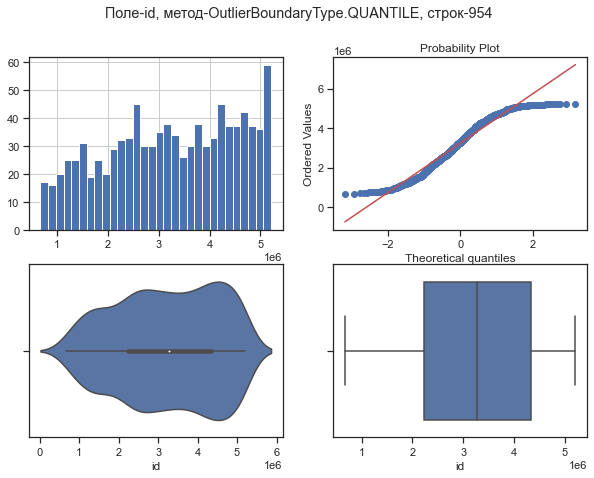

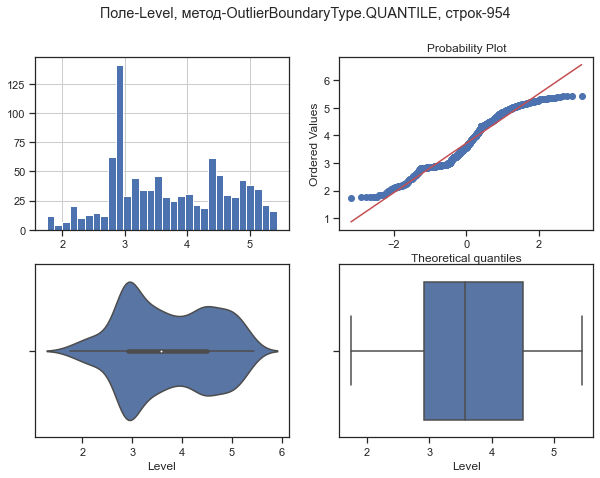

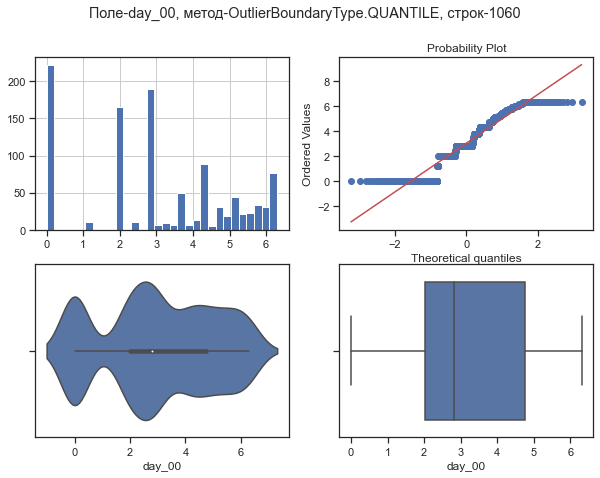

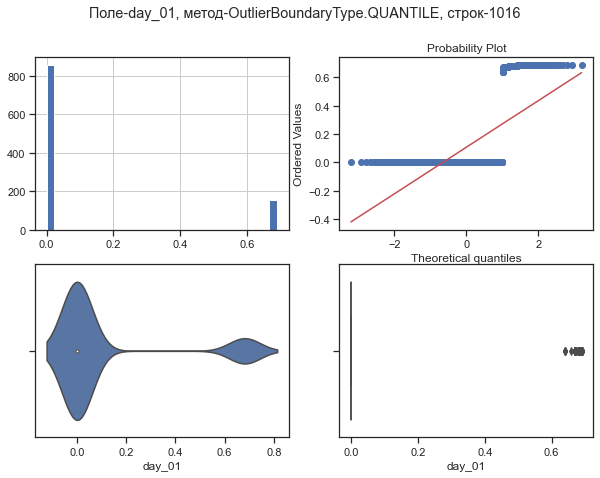

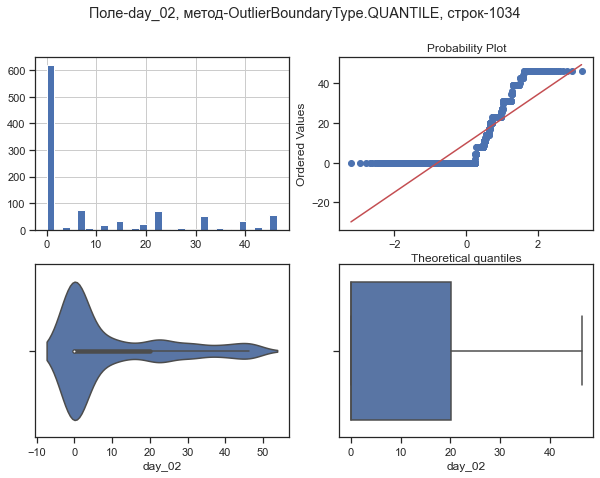

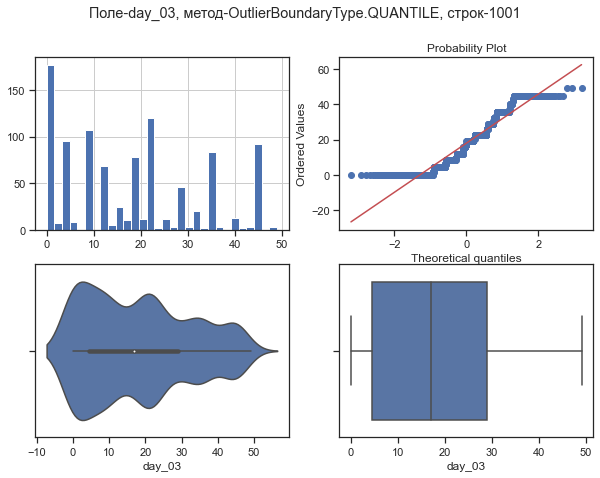

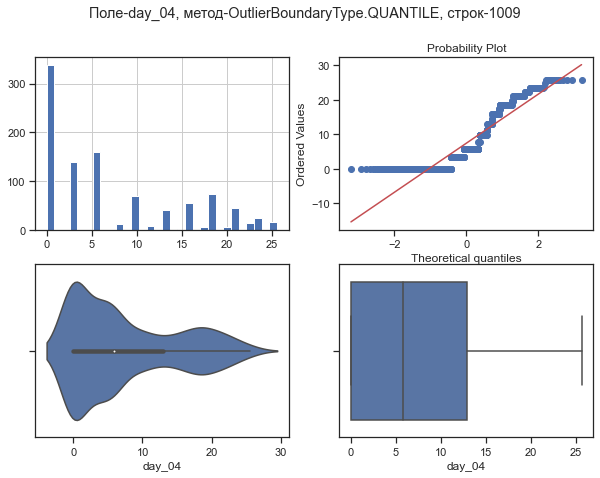

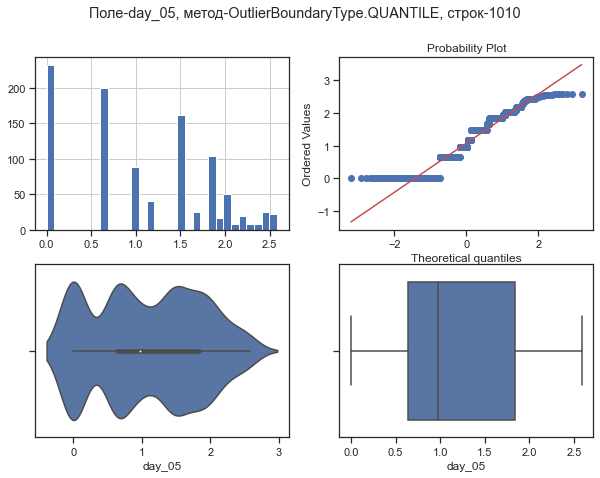

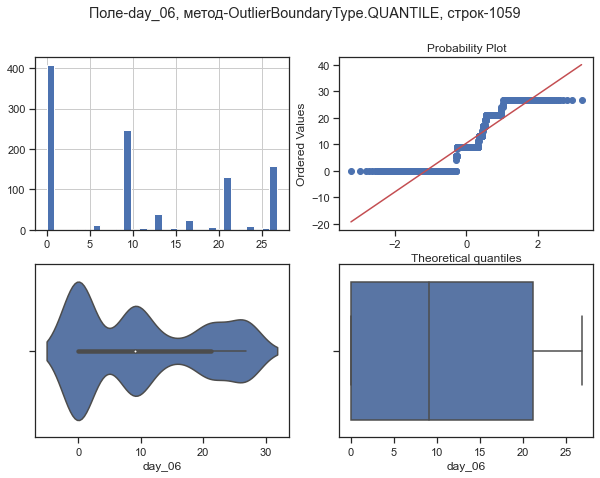

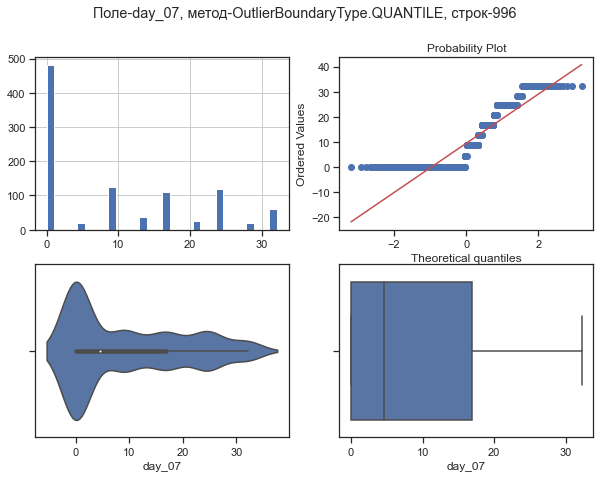

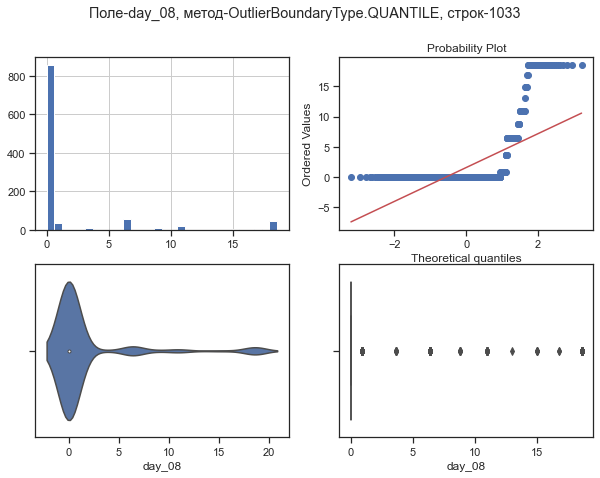

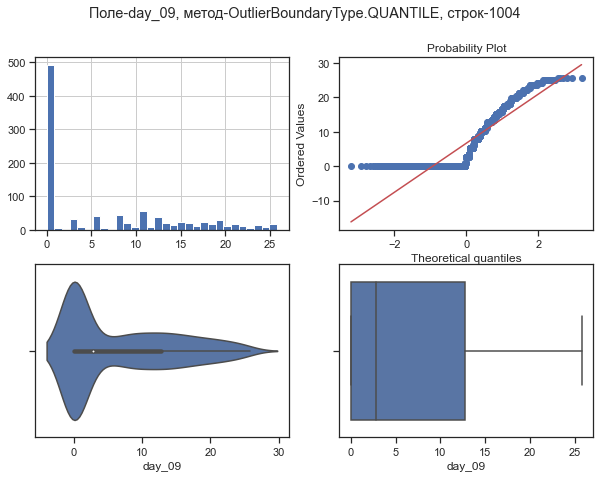

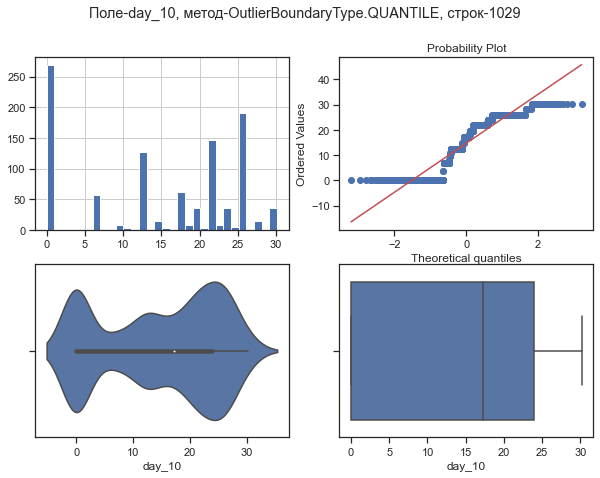

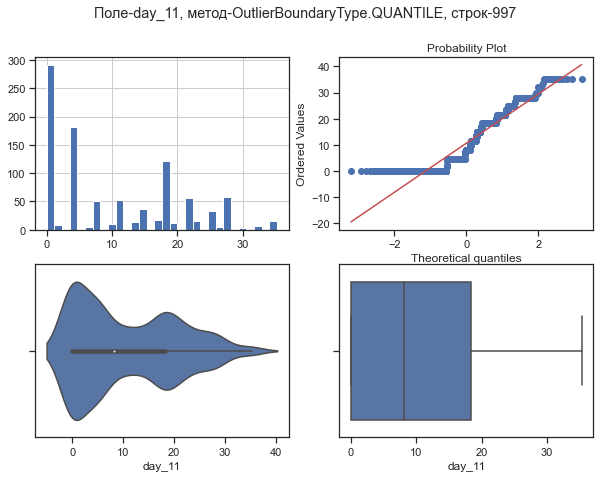

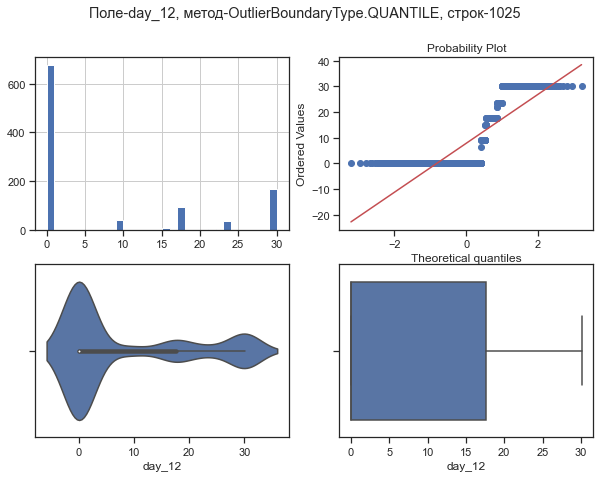

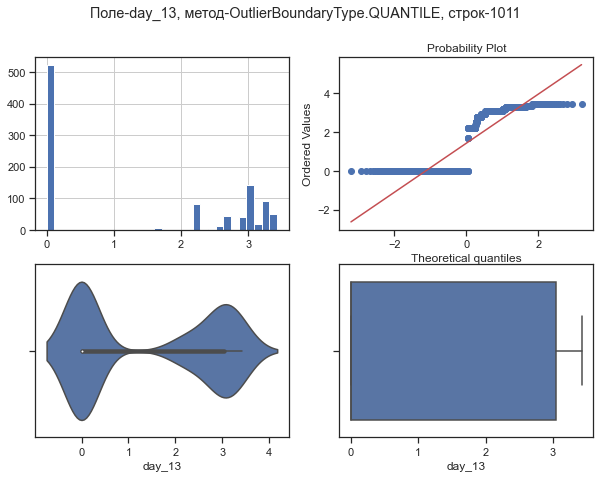

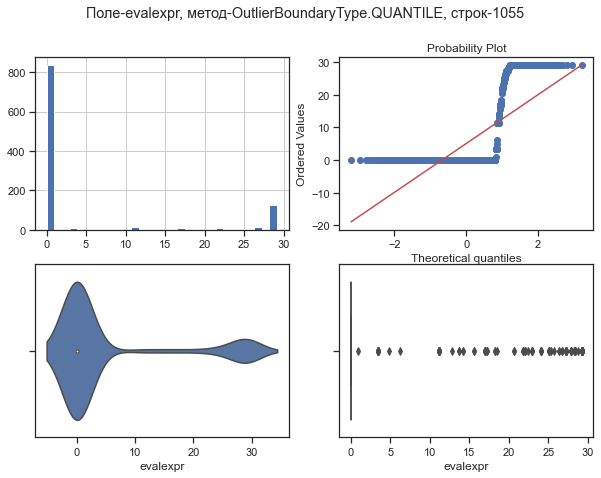

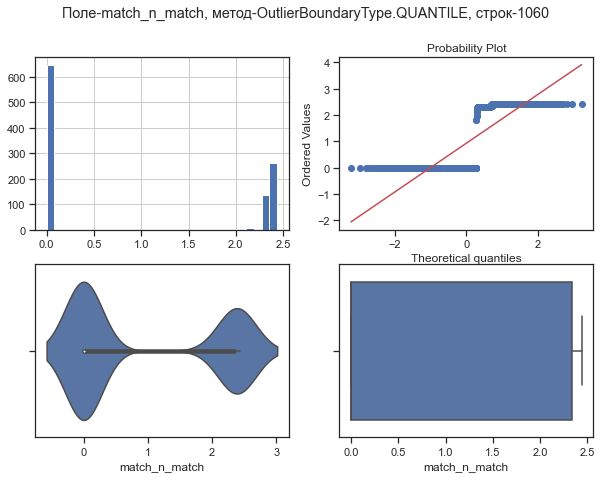

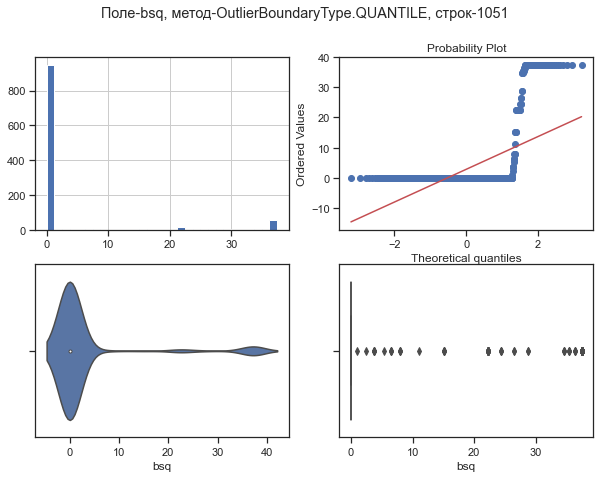

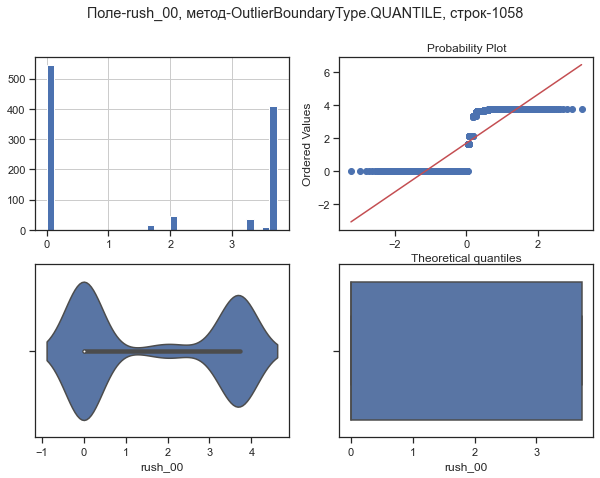

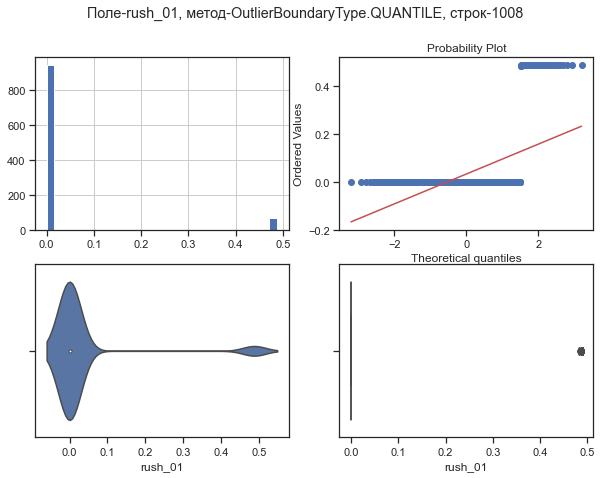

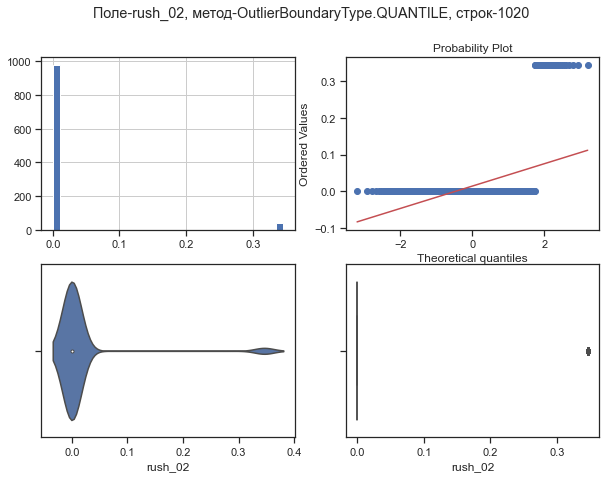

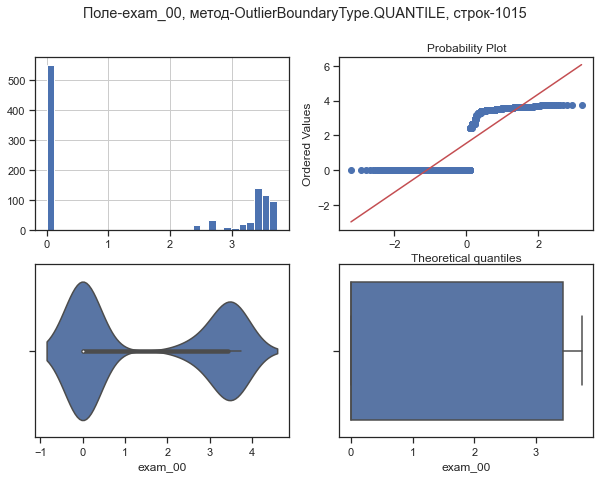

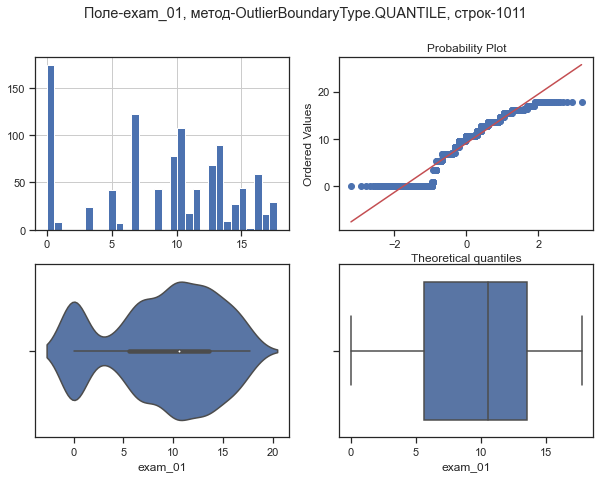

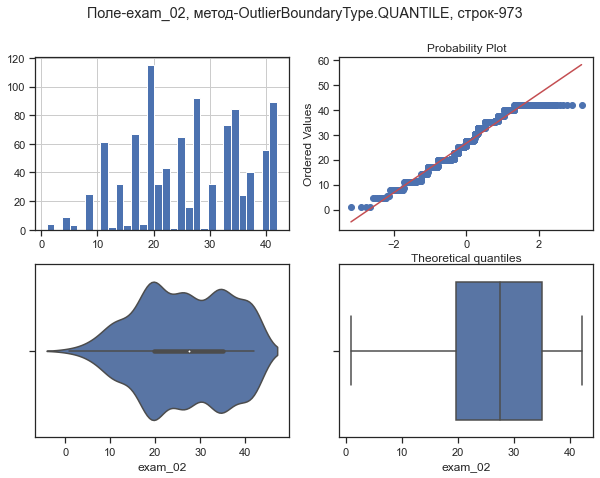

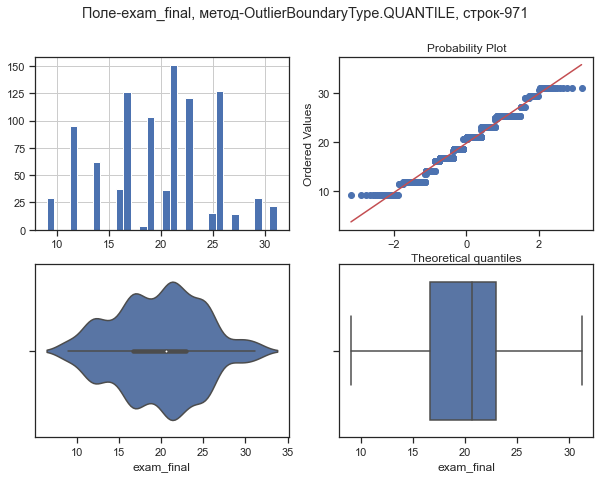

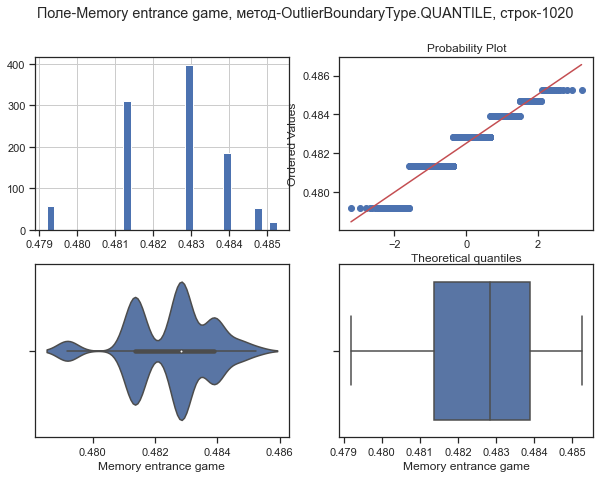

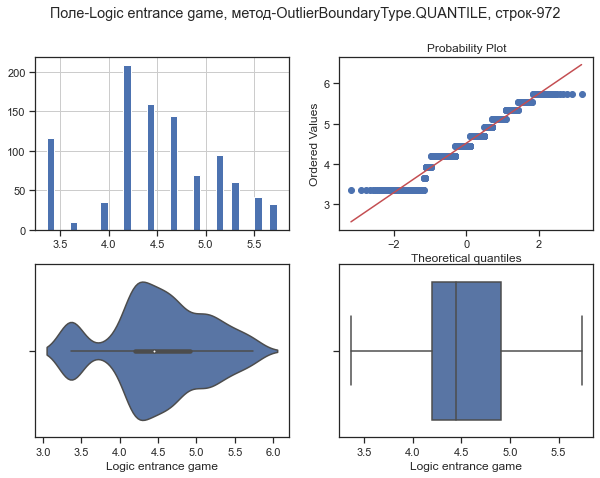

In [ ]:
data_outliers_deleted = data_scaled.copy()
for col in outliers_treatment_cols:    
    for obt in OutlierBoundaryType:
        # Вычисление верхней и нижней границы
        lower_boundary, upper_boundary = get_outlier_boundaries(data_scaled, col, obt)
        # Флаги для удаления выбросов
        outliers_temp = np.where(data_scaled[col] > upper_boundary, True, 
                                 np.where(data_scaled[col] < lower_boundary, True, False))
        # Удаление данных на основе флага
        data_trimmed = data_scaled.loc[~(outliers_temp), ]
        title = 'Поле-{}, метод-{}, строк-{}'.format(col, obt, data_trimmed.shape[0])
        diagnostic_plots(data_trimmed, col, title)

### Замена выбросов 

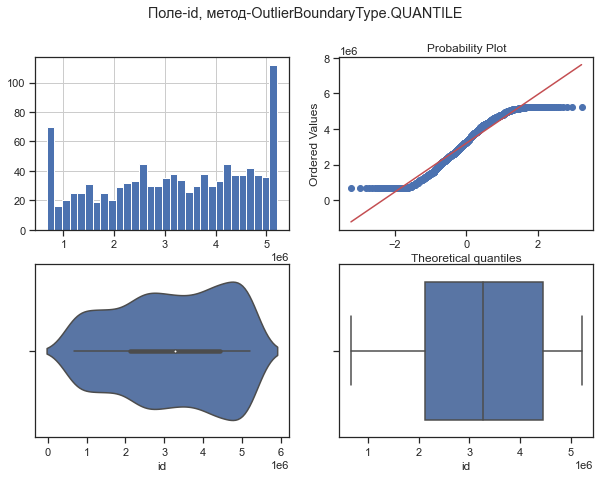

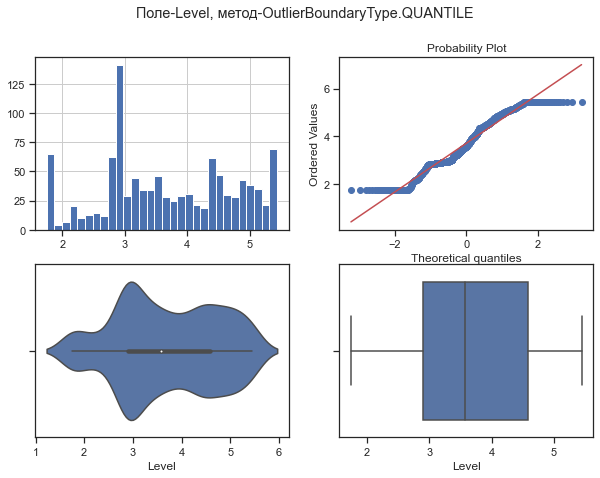

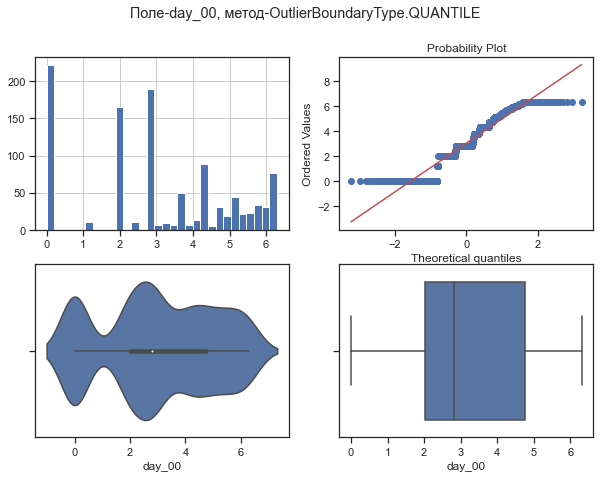

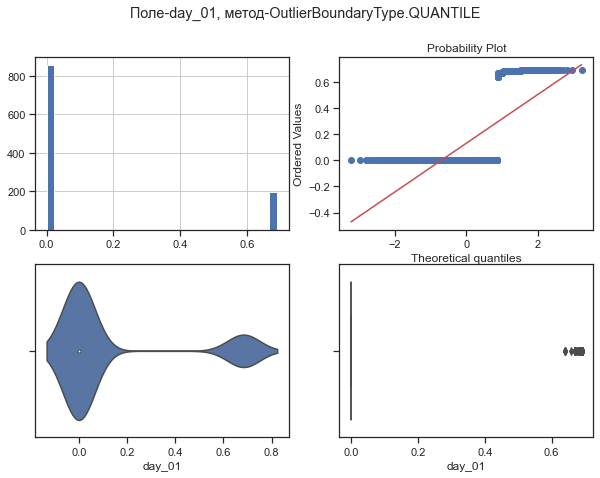

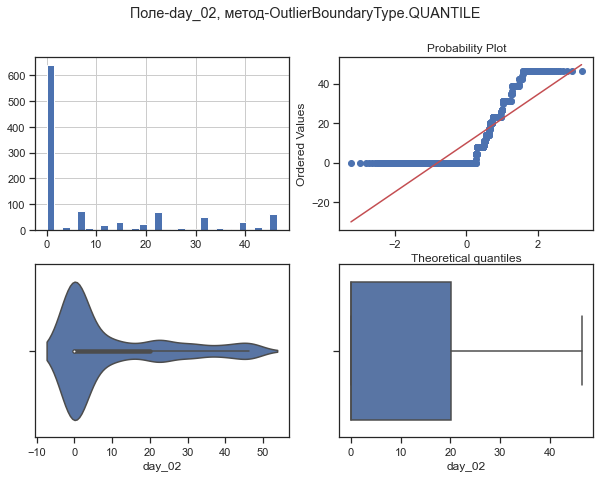

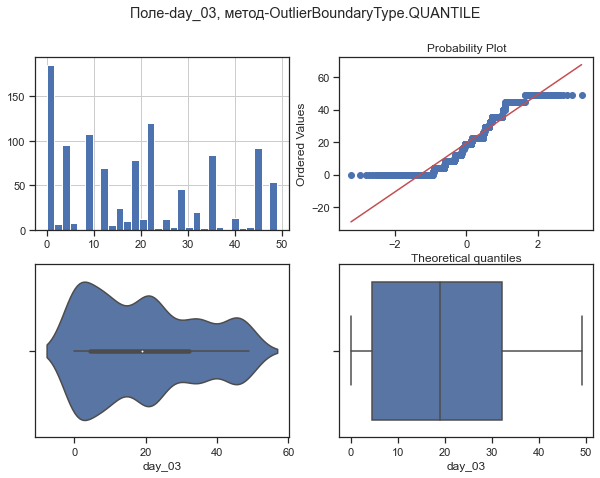

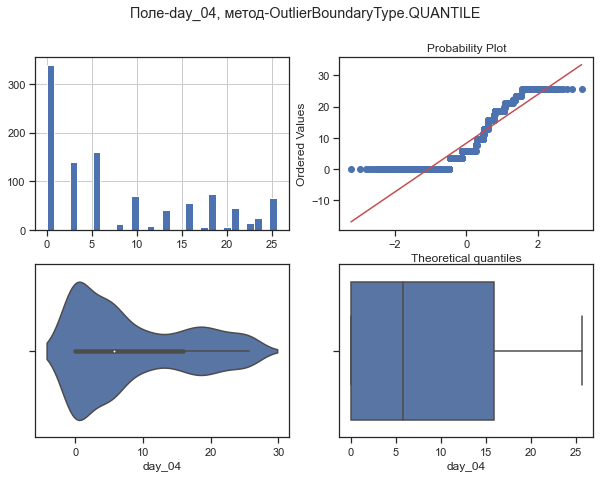

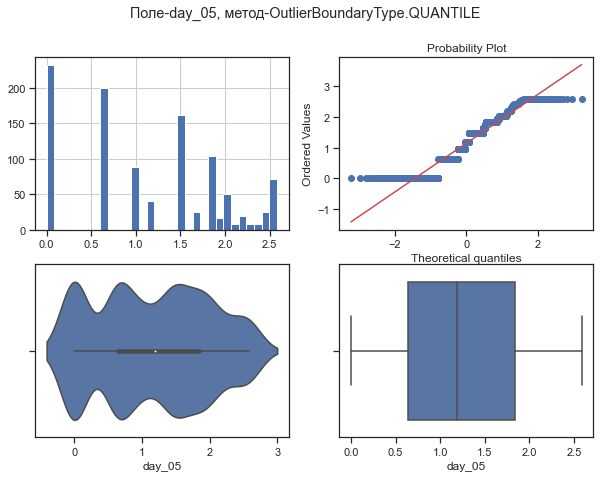

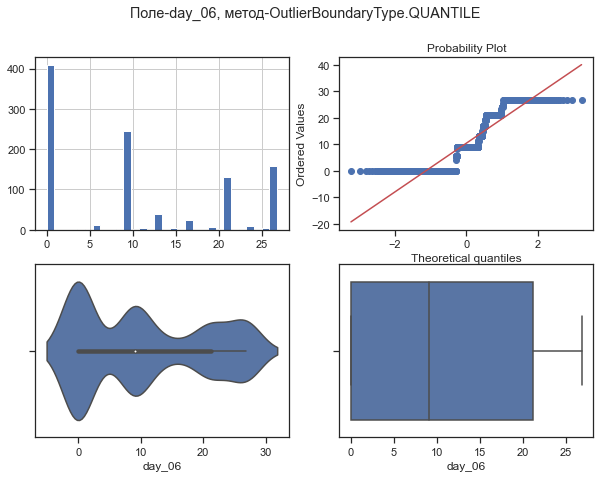

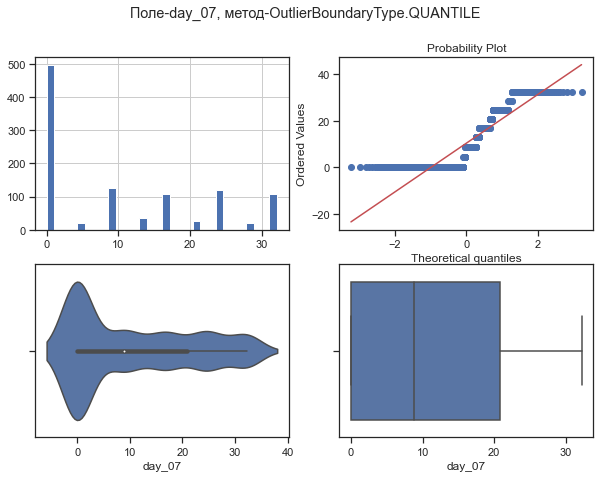

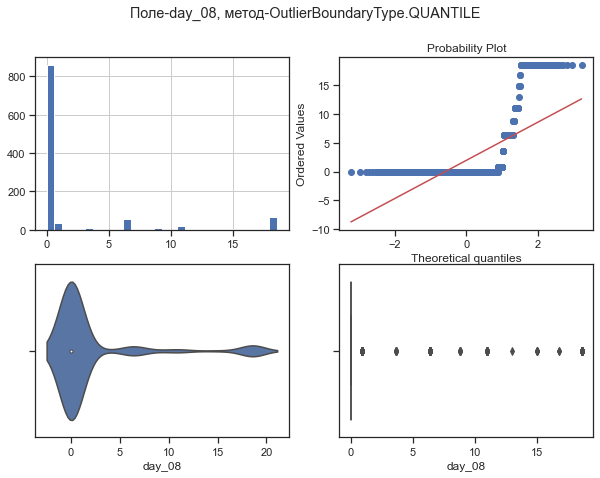

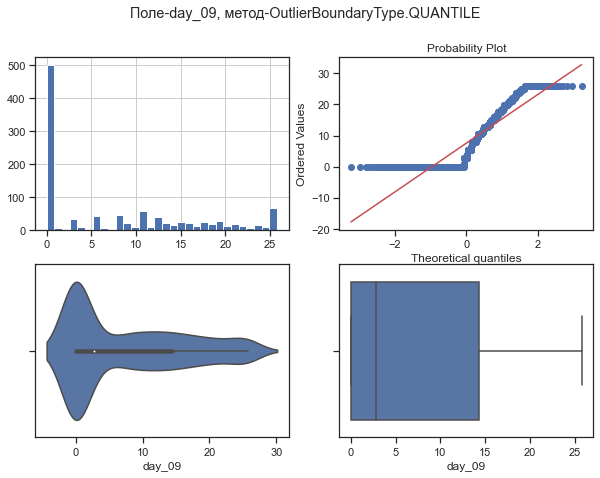

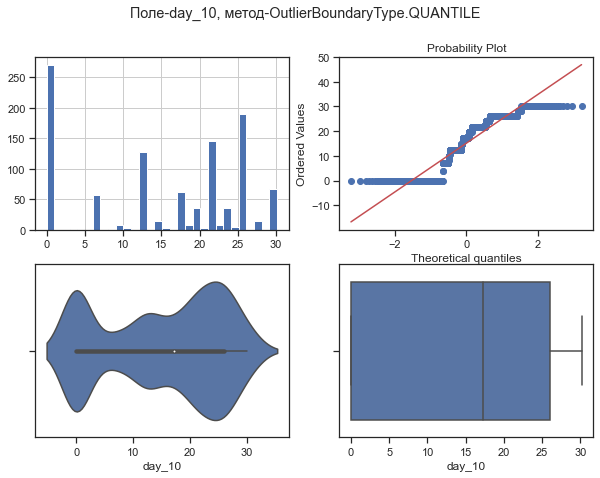

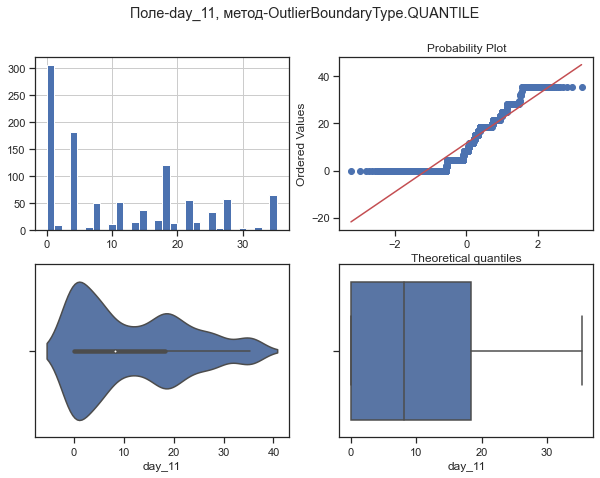

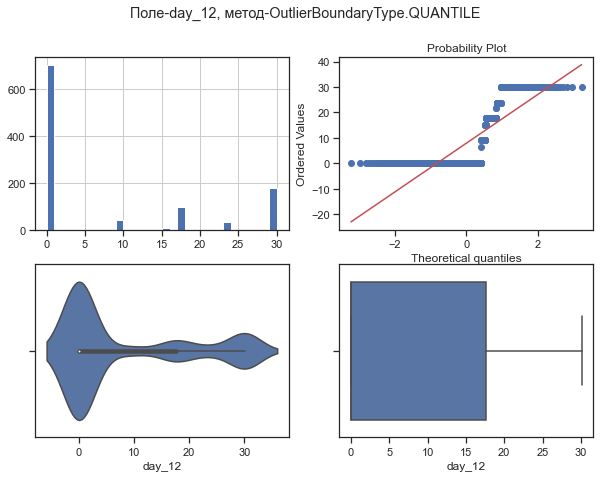

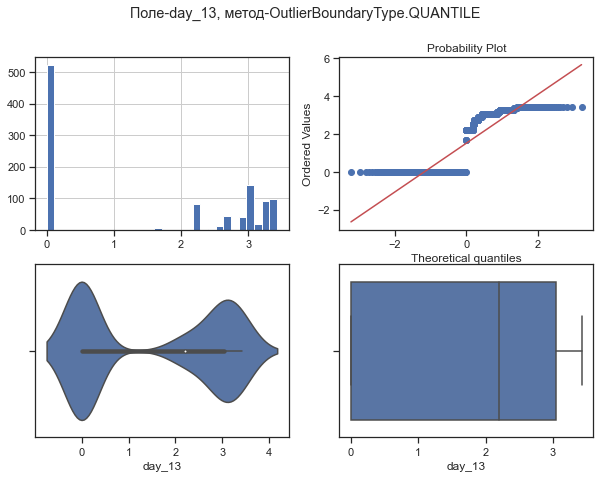

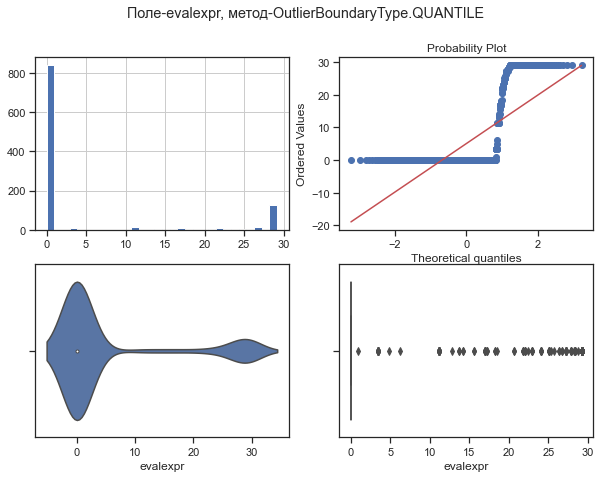

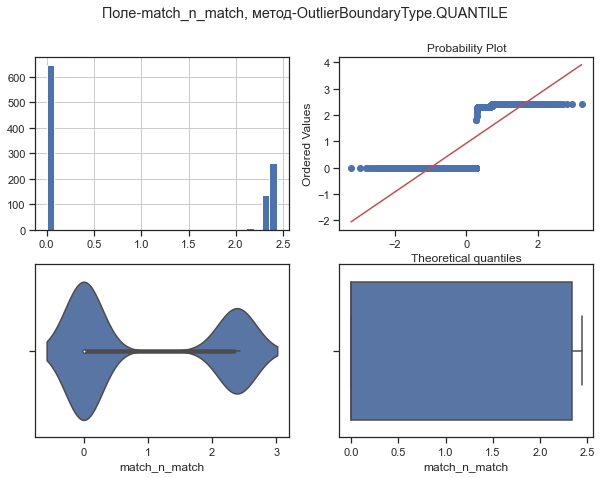

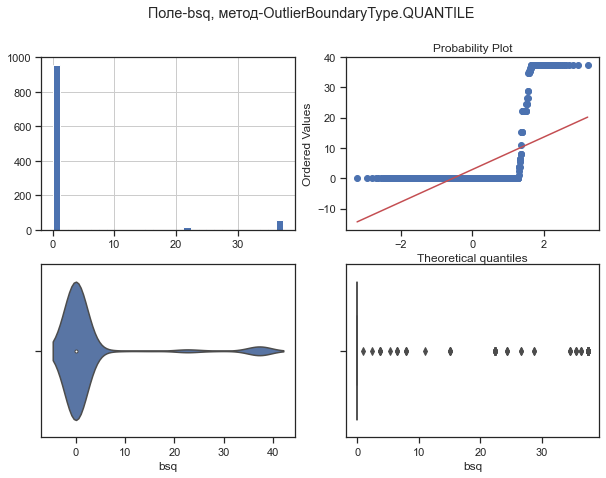

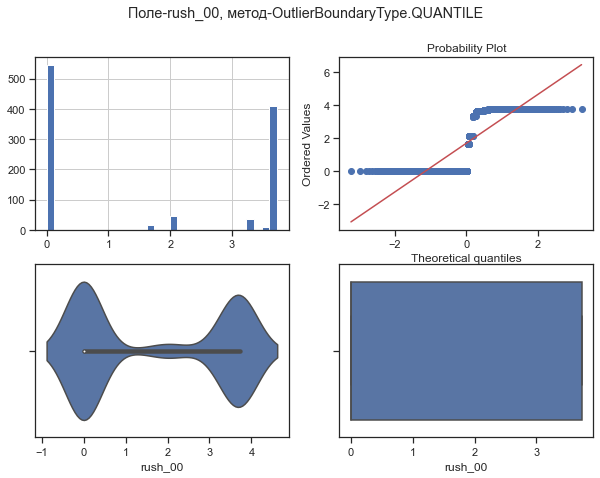

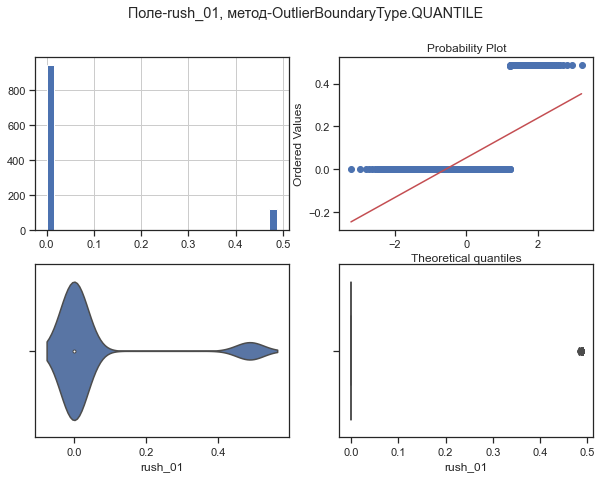

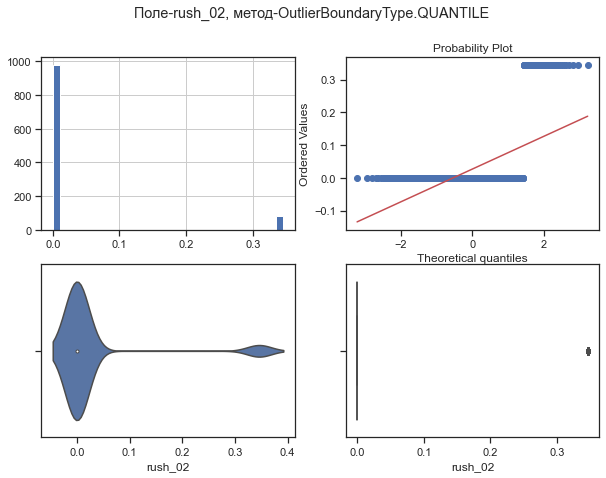

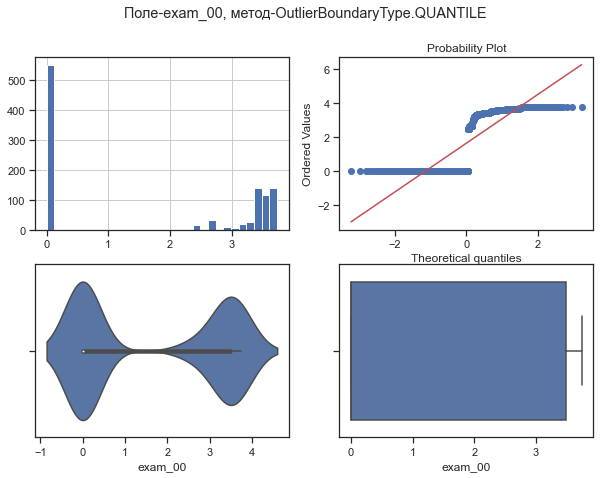

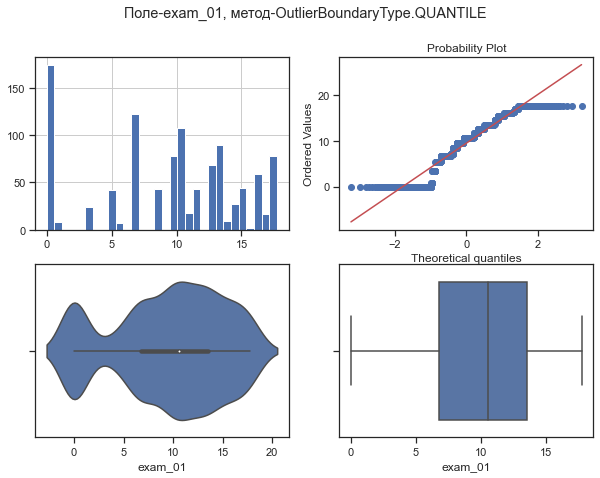

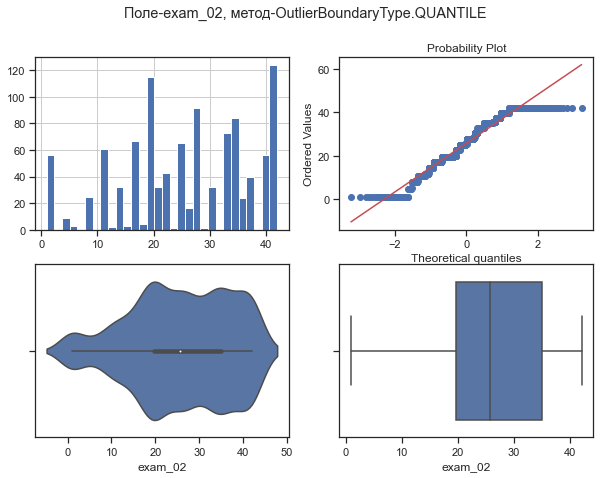

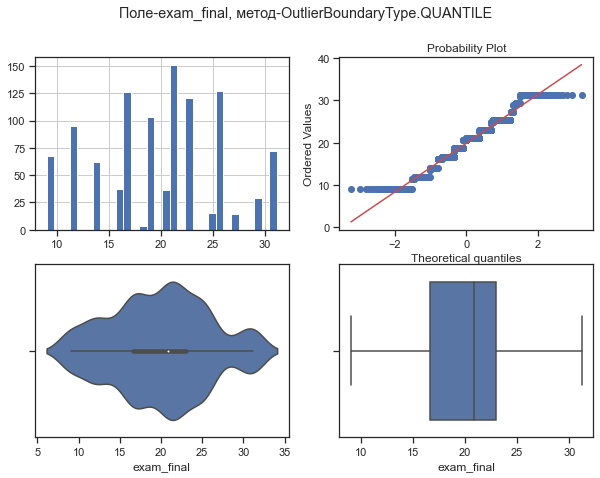

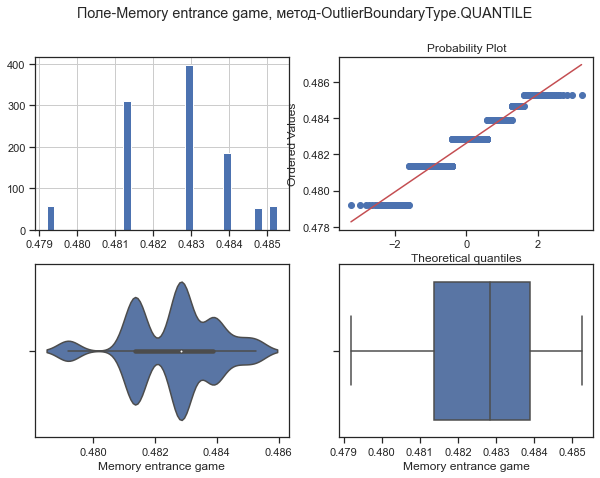

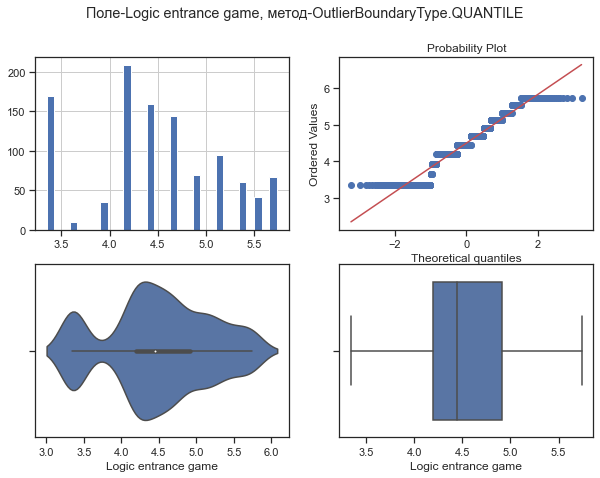

In [ ]:
for col in outliers_treatment_cols:    
    for obt in OutlierBoundaryType:
        # Вычисление верхней и нижней границы
        lower_boundary, upper_boundary = get_outlier_boundaries(data_scaled, col, obt)
        # Изменение данных
        data_outliers_deleted[col] = np.where(data_scaled[col] > upper_boundary, upper_boundary, 
                                 np.where(data_scaled[col] < lower_boundary, lower_boundary, data_scaled[col]))
        title = 'Поле-{}, метод-{}'.format(col, obt)
        diagnostic_plots(data_outliers_deleted, col, title)

In [ ]:
data_outliers_deleted

,id,Native city,Gender,Wave id,Level,Heard about school from,Life status,day_00,day_01,day_02,...,rush_00,rush_01,rush_02,exam_00,exam_01,exam_02,exam_final,Memory entrance game,Logic entrance game,contract_status
0,7.440813e+05,53.142349,10.509352,2.817426,4.535441,18.008774,1.988700,2.015112,-0.000000,0.000000,...,-0.000000,-0.000000,-0.0,3.581089,12.683845,42.027245,24.872179,0.483893,4.446321,157.438327
1,2.110445e+06,19.312977,0.000000,0.971741,5.125305,24.773476,0.996627,0.000000,-0.000000,7.721259,...,3.678351,-0.000000,-0.0,-0.000000,6.792565,14.386547,14.040287,0.481360,4.197516,157.438327
2,1.159231e+06,49.136182,0.000000,1.906271,4.215184,24.773476,1.988700,0.000000,-0.000000,14.142707,...,-0.000000,-0.000000,-0.0,-0.000000,0.000000,10.997127,16.639080,0.481360,4.446321,157.438327
3,2.487437e+06,66.153741,0.000000,0.971741,4.843920,24.773476,0.996627,2.015112,-0.000000,22.912283,...,-0.000000,-0.000000,-0.0,-0.000000,0.000000,17.081711,16.639080,0.483893,3.346505,157.438327
4,1.600657e+06,21.757480,10.509352,2.817426,2.950189,24.773476,0.000000,0.000000,-0.000000,0.000000,...,3.729576,-0.000000,-0.0,3.623975,11.756081,0.929565,25.334339,0.481360,4.683573,157.438327
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1055,4.977851e+06,64.783291,10.509352,2.817426,2.882900,32.602702,0.996627,2.808948,-0.000000,0.000000,...,-0.000000,-0.000000,-0.0,-0.000000,0.000000,14.386547,11.878068,0.481360,4.446321,157.438327
1056,2.610098e+06,55.346994,10.509352,2.817426,2.976363,4.063310,0.996627,2.015112,-0.000000,7.721259,...,3.729576,-0.000000,-0.0,2.660155,8.344540,19.686011,16.639080,0.485255,4.683573,157.438327
1057,4.284471e+06,43.153499,10.509352,1.906271,4.167804,4.063310,0.996627,4.317815,0.686664,7.721259,...,-0.000000,0.487815,-0.0,3.737127,13.565017,42.027245,25.334339,0.482840,5.541040,157.438327
1058,4.986330e+06,42.886603,10.509352,2.817426,4.076357,24.773476,0.996627,5.117555,-0.000000,46.408508,...,3.650781,-0.000000,-0.0,-0.000000,16.141520,34.971162,25.334339,0.482840,4.683573,157.438327


# Отбор признаков

## Метод фильтрации 

### Метод, основынный на корреляции 

In [1]:
cols_to_fs = data_outliers_deleted.columns
fs_data = data_outliers_deleted[cols_to_fs].copy()
fs_data.shape

NameError: ignored

In [ ]:
fs_data_features = list(zip(
[i for i in fs_data.columns],
zip(
    #типы колонок
    [str(i) for i in fs_data.dtypes],
    #проверка, есть ли пропущенные значения
    [i for i in fs_data.isnull().sum()]
)))
fs_data_features

In [ ]:
fs_data.tail()

In [ ]:
heatmap_cols = ['Gender', 'Level', 'rush_00', 'evalexpr', 'bsq', 'exam_final',
        'Memory entrance game', 'Logic entrance game']
sns.heatmap(fs_data[heatmap_cols].corr(), annot=True, fmt='.3f')

In [ ]:
# Формирование DataFrame с сильными корреляциями
def make_corr_df(df):
    cr = df.corr() # !!!вот здесь был недочет - data.corr -> df.corr
    cr = cr.abs().unstack() 
    cr = cr.sort_values(ascending=False)
    cr = cr[cr >= 0.3]
    cr = cr[cr < 1]
    cr = pd.DataFrame(cr).reset_index()
    cr.columns = ['f1', 'f2', 'corr']
    return cr

In [ ]:
make_corr_df(fs_data)

In [ ]:
# Обнаружение групп коррелирующих признаков
def corr_groups(cr):
    grouped_feature_list = []
    correlated_groups = []

    for feature in cr['f1'].unique():
        if feature not in grouped_feature_list:
            # находим коррелирующие признаки
            correlated_block = cr[cr['f1'] == feature]
            cur_dups = list(correlated_block['f2'].unique()) + [feature]
            grouped_feature_list = grouped_feature_list + cur_dups
            correlated_groups.append(cur_dups)
    return correlated_groups

In [ ]:
# Группы коррелирующих признаков
corr_groups(make_corr_df(fs_data))

### Метод, основанный на статистических характеристиках 

In [ ]:
from sklearn.feature_selection import mutual_info_classif, mutual_info_regression
from sklearn.feature_selection import SelectKBest, SelectPercentile

In [ ]:
x = fs_data.drop('contract_status', axis=1)
x

In [ ]:
y = fs_data['contract_status']
y

In [ ]:
mi = mutual_info_regression(x, y)
mi = pd.Series(mi)
mi.index = x.columns
mi.sort_values(ascending=False).plot.bar(figsize=(10,5))
plt.ylabel('Взаимная информация')

In [ ]:
sel_mi = SelectKBest(mutual_info_regression, k=5).fit(x, y)

list(zip(x.columns, sel_mi.get_support()))

# Обучение моделей с различными вариантами масштабирования признаков 

In [ ]:
data_encoded['contract_status']

0       1
1       1
2       1
3       1
4       1
       ..
1055    1
1056    1
1057    1
1058    1
1059    0
Name: contract_status, Length: 1060, dtype: int64

In [ ]:
# данные с выпдоненными 1-4 пунктами предобработки 
#(устранение пропусков в данных, кодирование категориальных признаков, нормализацию числовых признаков, 
#масштабирование признаков
data_cs11_scaled

,id,Native city,Gender,Wave id,Level,Heard about school from,Life status,day_00,day_01,day_02,...,bsq,rush_00,rush_01,rush_02,exam_00,exam_01,exam_02,exam_final,Memory entrance game,Logic entrance game
0,-1.696880,0.500799,0.538087,0.858850,0.697399,-0.134685,1.557304,-0.493445,-0.486639,-0.462471,...,-0.159063,-0.948585,-0.353928,-0.289559,1.127676,0.556894,2.040839,0.719267,0.828872,-0.068591
1,-0.749732,-1.437178,-1.858435,-1.286862,1.195437,0.497119,-0.113976,-1.484201,-0.486639,-0.040914,...,-0.159063,1.117583,-0.353928,-0.289559,-0.954539,-0.485836,-0.969573,-0.856234,-0.854255,-0.402352
2,-1.409103,0.271298,-1.858435,-0.200419,0.426997,0.497119,1.557304,-1.484201,-0.486639,0.309676,...,-0.159063,-0.948585,-0.353928,-0.289559,-0.954539,-1.688090,-1.252241,-0.478239,-0.854255,-0.068591
3,-0.488406,1.246180,-1.858435,-1.286862,0.957856,0.497119,-0.113976,-0.493445,-0.486639,0.788467,...,-0.159063,-0.948585,-0.353928,-0.289559,-0.954539,-1.688090,-0.744805,-0.478239,0.828872,-1.948598
4,-1.103112,-1.297140,0.538087,0.858850,-0.641071,0.497119,-1.792927,-1.484201,-0.486639,-0.462471,...,-0.159063,1.146357,-0.353928,-0.289559,1.152612,0.392684,-2.169368,0.786488,-0.854255,0.249673
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1055,1.237920,1.167671,0.538087,0.858850,-0.697885,1.228347,-0.113976,-0.103145,-0.486639,-0.462471,...,-0.159063,-0.948585,-0.353928,-0.289559,-0.954539,-1.688090,-0.969573,-1.170730,-0.854255,-0.068591
1056,-0.403379,0.627096,0.538087,0.858850,-0.618971,-1.437153,-0.113976,-0.493445,-0.486639,-0.040914,...,-0.159063,1.146357,-0.353928,-0.289559,0.592201,-0.211144,-0.527614,-0.478239,1.734175,0.249673
1057,0.757277,-0.071431,0.538087,-0.200419,0.386993,-1.437153,-0.113976,0.638709,2.067061,-0.040914,...,-0.159063,-0.948585,2.826269,-0.289559,1.237869,0.712857,1.335577,0.786488,0.129195,1.399929
1058,1.243798,-0.086720,0.538087,0.858850,0.309782,0.497119,-0.113976,1.031912,-0.486639,2.071286,...,-0.159063,1.102097,-0.353928,-0.289559,-0.954539,1.168887,0.747121,0.786488,0.129195,0.249673


In [ ]:
# Разделим выборку на обучающую и тестовую
X_train_basic, X_test_basic, y_train_basic, y_test_basic = train_test_split(data_cs11_scaled, data_encoded['contract_status'],
                                                    test_size=0.2,
                                                    random_state=1)
# Преобразуем массивы в DataFrame
X_train_basic_df = arr_to_df(X_train_basic)
X_test_basic_df = arr_to_df(X_test_basic)

X_train_basic_df.shape, X_test_basic_df.shape

((848, 33), (212, 33))

In [ ]:
# данные, с замененными выбросами
data_outliers_deleted

,id,Native city,Gender,Wave id,Level,Heard about school from,Life status,day_00,day_01,day_02,...,rush_00,rush_01,rush_02,exam_00,exam_01,exam_02,exam_final,Memory entrance game,Logic entrance game,contract_status
0,7.440813e+05,53.142349,10.509352,2.817426,4.535441,18.008774,1.988700,2.015112,-0.000000,0.000000,...,-0.000000,-0.000000,-0.0,3.581089,12.683845,42.027245,24.872179,0.483893,4.446321,157.438327
1,2.110445e+06,19.312977,0.000000,0.971741,5.125305,24.773476,0.996627,0.000000,-0.000000,7.721259,...,3.678351,-0.000000,-0.0,-0.000000,6.792565,14.386547,14.040287,0.481360,4.197516,157.438327
2,1.159231e+06,49.136182,0.000000,1.906271,4.215184,24.773476,1.988700,0.000000,-0.000000,14.142707,...,-0.000000,-0.000000,-0.0,-0.000000,0.000000,10.997127,16.639080,0.481360,4.446321,157.438327
3,2.487437e+06,66.153741,0.000000,0.971741,4.843920,24.773476,0.996627,2.015112,-0.000000,22.912283,...,-0.000000,-0.000000,-0.0,-0.000000,0.000000,17.081711,16.639080,0.483893,3.346505,157.438327
4,1.600657e+06,21.757480,10.509352,2.817426,2.950189,24.773476,0.000000,0.000000,-0.000000,0.000000,...,3.729576,-0.000000,-0.0,3.623975,11.756081,0.929565,25.334339,0.481360,4.683573,157.438327
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1055,4.977851e+06,64.783291,10.509352,2.817426,2.882900,32.602702,0.996627,2.808948,-0.000000,0.000000,...,-0.000000,-0.000000,-0.0,-0.000000,0.000000,14.386547,11.878068,0.481360,4.446321,157.438327
1056,2.610098e+06,55.346994,10.509352,2.817426,2.976363,4.063310,0.996627,2.015112,-0.000000,7.721259,...,3.729576,-0.000000,-0.0,2.660155,8.344540,19.686011,16.639080,0.485255,4.683573,157.438327
1057,4.284471e+06,43.153499,10.509352,1.906271,4.167804,4.063310,0.996627,4.317815,0.686664,7.721259,...,-0.000000,0.487815,-0.0,3.737127,13.565017,42.027245,25.334339,0.482840,5.541040,157.438327
1058,4.986330e+06,42.886603,10.509352,2.817426,4.076357,24.773476,0.996627,5.117555,-0.000000,46.408508,...,3.650781,-0.000000,-0.0,-0.000000,16.141520,34.971162,25.334339,0.482840,4.683573,157.438327


In [ ]:
# Разделим выборку на обучающую и тестовую
X_train_advanced, X_test_advanced, y_train_advanced, y_test_advanced = train_test_split(data_outliers_deleted.drop(['contract_status'], axis=1),
                                                    data_encoded['contract_status'],
                                                    test_size=0.2,
                                                    random_state=1)
# Преобразуем массивы в DataFrame
X_train_advanced_df = arr_to_df(X_train_advanced)
X_test_advanced_df = arr_to_df(X_test_advanced)

X_train_advanced_df.shape, X_test_advanced_df.shape

((848, 33), (212, 33))

In [ ]:
class MetricLogger:
    
    def __init__(self):
        self.df = pd.DataFrame(
            {'metric': pd.Series([], dtype='str'),
            'alg': pd.Series([], dtype='str'),
            'value': pd.Series([], dtype='float')})

    def add(self, metric, alg, value):
        """
        Добавление значения
        """
        # Удаление значения если оно уже было ранее добавлено
        self.df.drop(self.df[(self.df['metric']==metric)&(self.df['alg']==alg)].index, inplace = True)
        # Добавление нового значения
        temp = [{'metric':metric, 'alg':alg, 'value':value}]
        self.df = self.df.append(temp, ignore_index=True)

    def get_data_for_metric(self, metric, ascending=True):
        """
        Формирование данных с фильтром по метрике
        """
        temp_data = self.df[self.df['metric']==metric]
        temp_data_2 = temp_data.sort_values(by='value', ascending=ascending)
        return temp_data_2['alg'].values, temp_data_2['value'].values
    
    def plot(self, str_header, metric, ascending=True, figsize=(5, 5)):
        """
        Вывод графика
        """
        array_labels, array_metric = self.get_data_for_metric(metric, ascending)
        fig, ax1 = plt.subplots(figsize=figsize)
        pos = np.arange(len(array_metric))
        rects = ax1.barh(pos, array_metric,
                         align='center',
                         height=0.5, 
                         tick_label=array_labels)
        ax1.set_title(str_header)
        for a,b in zip(pos, array_metric):
            plt.text(0.5, a-0.05, str(round(b,3)), color='white')
        plt.show()    


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error

In [ ]:
clas_models_dict = {'LinR': LinearRegression(), 
                    'SVR': SVR(),
                    'KNN_5':KNeighborsRegressor(n_neighbors=5),
                    'Tree':DecisionTreeRegressor(random_state=1),
                    'GB': GradientBoostingRegressor(random_state=1),
                    'RF':RandomForestRegressor(n_estimators=50, random_state=1)}

In [ ]:
X_data_dict = {'Basic': (X_train_basic_df, X_test_basic_df),
               'Advanced': (X_train_advanced_df, X_test_advanced_df)}

In [ ]:
def test_models(clas_models_dict, X_data_dict, y_train, y_test):
    
    logger = MetricLogger()
    
    for model_name, model in clas_models_dict.items():
        
        for data_name, data_tuple in X_data_dict.items():

            X_train, X_test = data_tuple
              
            model.fit(X_train, y_train)
            y_pred = model.predict(X_test)
            mse = mean_squared_error(y_test, y_pred)
            logger.add(model_name, data_name, mse)
            
    return logger

In [ ]:
%%time
logger = test_models(clas_models_dict, X_data_dict, y_train_basic, y_test_basic)

Wall time: 1.11 s


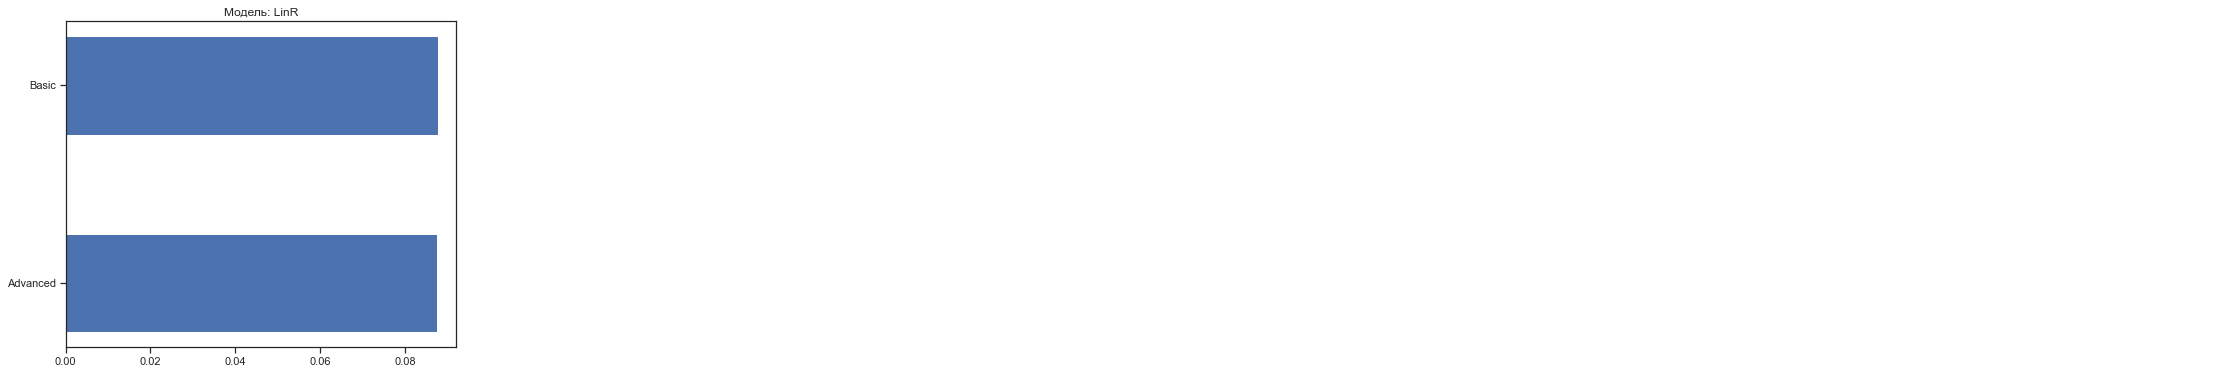

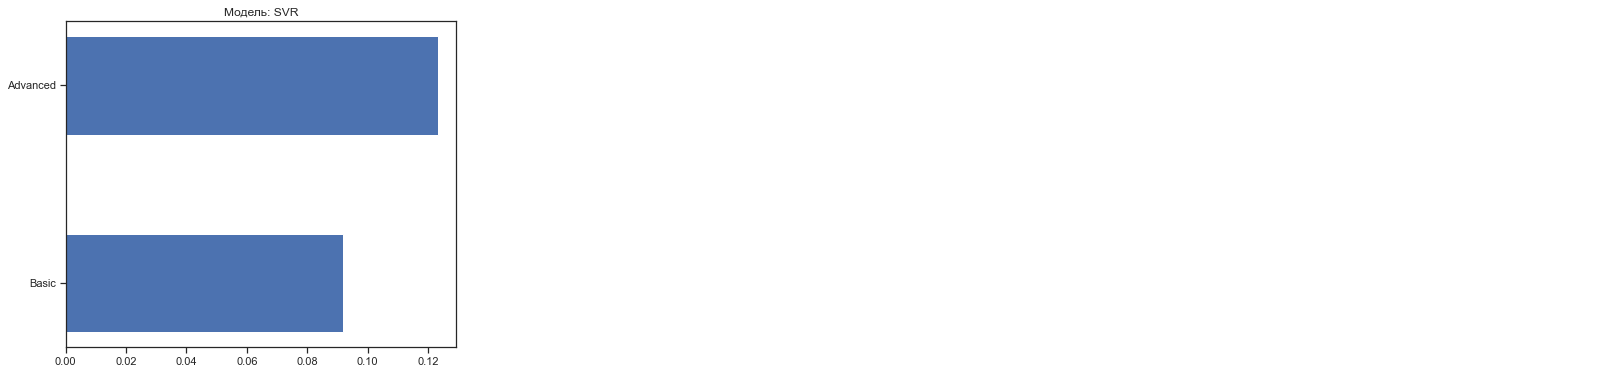

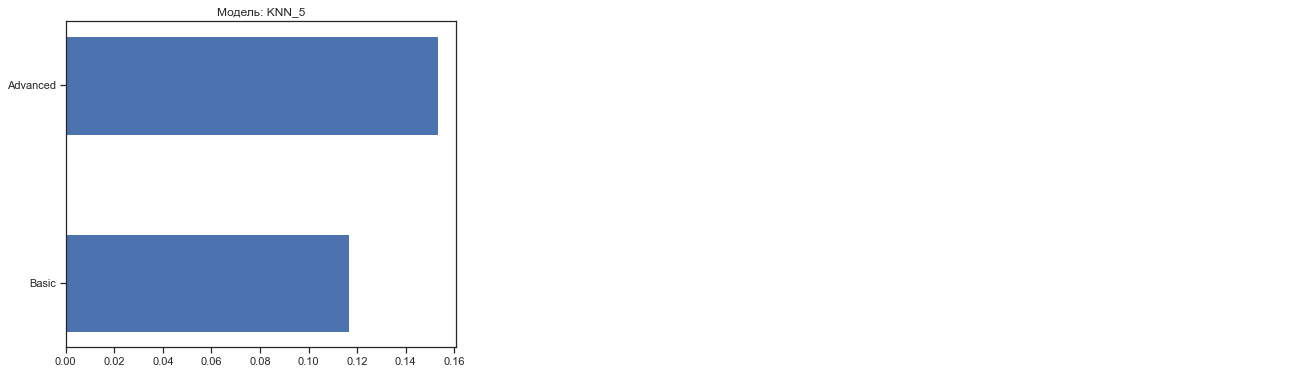

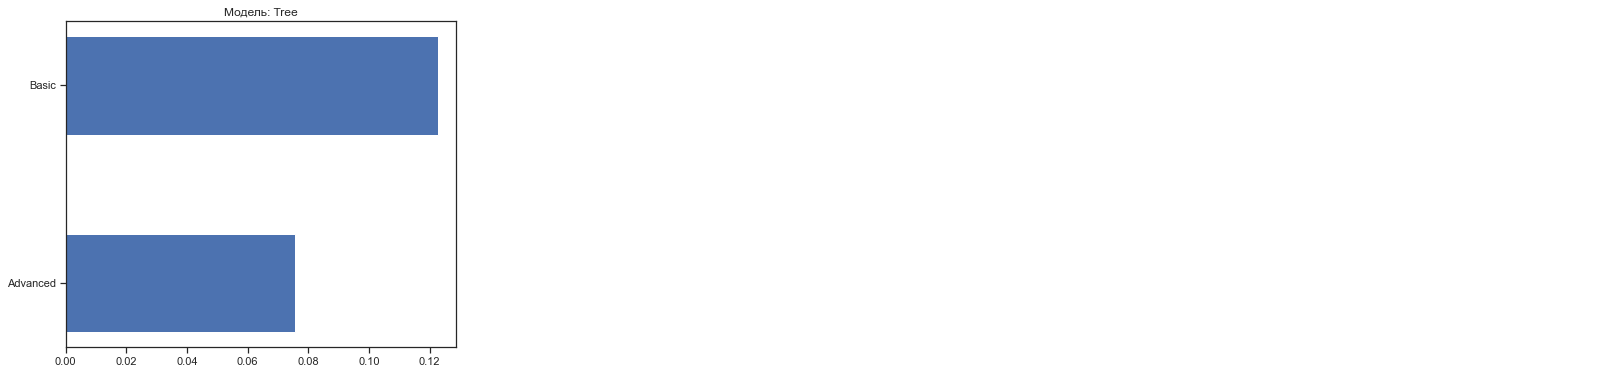

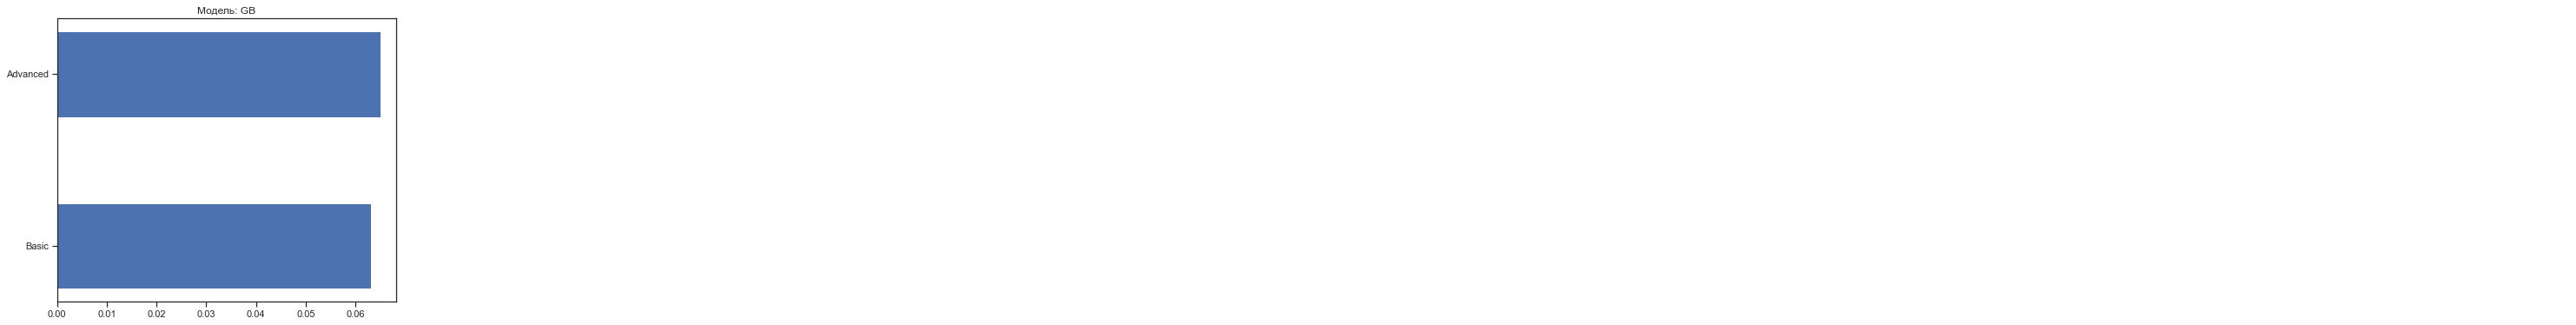

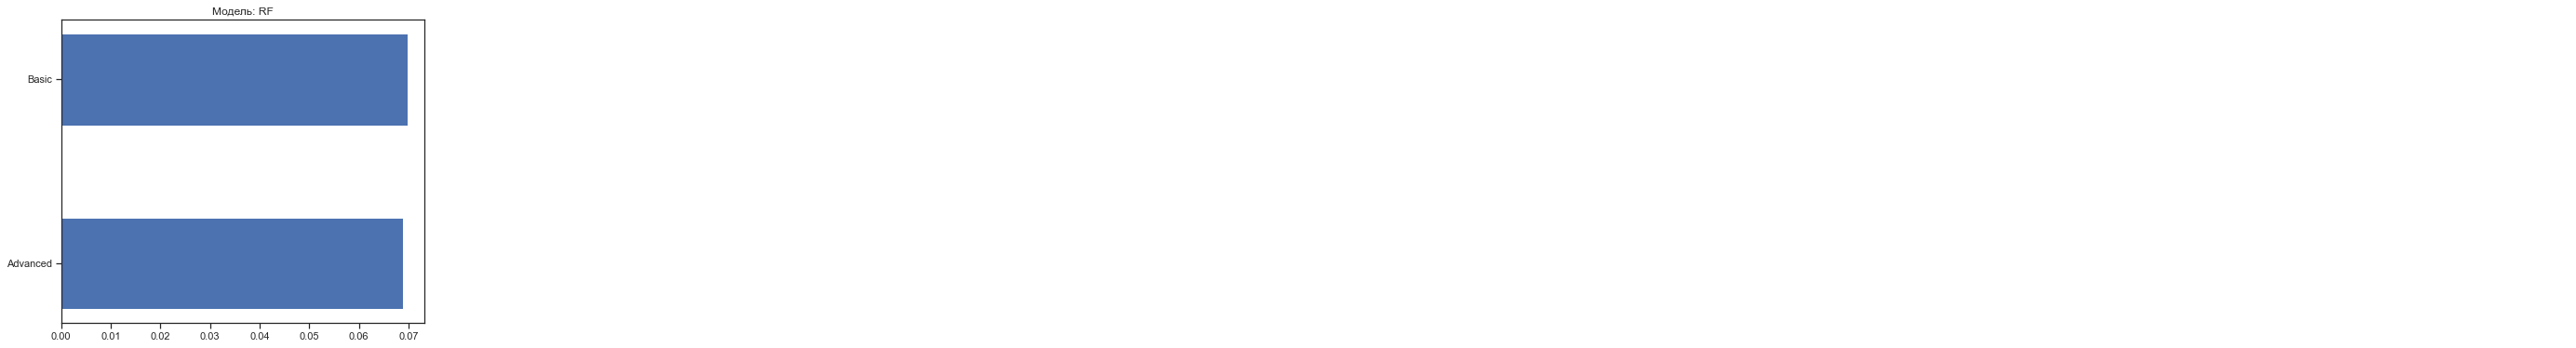

In [ ]:
# Построим графики метрик качества модели
for model in clas_models_dict:
    logger.plot('Модель: ' + model, model, figsize=(7, 6))

# Модель с использованием AutoML библиотеки mljar

In [ ]:
!pip install --user mljar-supervised
!pip install delayed

In [ ]:
#from supervised import AutoML
import sklearn
from sklearn.model_selection import train_test_split
from supervised.automl import AutoML


In [ ]:
train = data_loaded

In [ ]:
automl = AutoML()

In [ ]:
automl.fit(train[train.columns[:-1]], train["contract_status"])

AutoML directory: AutoML_1
The task is binary_classification with evaluation metric logloss
AutoML will use algorithms: ['Baseline', 'Linear', 'Decision Tree', 'Random Forest', 'Xgboost', 'Neural Network']
AutoML will ensemble availabe models


2021-05-16 20:58:37,906 supervised.preprocessing.eda ERROR There was an issue when running EDA. 'charmap' codec can't encode characters in position 11-16: character maps to <undefined>


AutoML steps: ['simple_algorithms', 'default_algorithms', 'ensemble']
* Step simple_algorithms will try to check up to 3 models
1_Baseline logloss 0.39034 trained in 0.38 seconds
2_DecisionTree logloss 0.361809 trained in 15.63 seconds
3_Linear logloss 0.24329 trained in 3.41 seconds
* Step default_algorithms will try to check up to 3 models
4_Default_Xgboost logloss 0.239248 trained in 7.1 seconds
5_Default_NeuralNetwork logloss 0.314716 trained in 1.37 seconds
6_Default_RandomForest logloss 0.25748 trained in 4.36 seconds
* Step ensemble will try to check up to 1 model
Ensemble logloss 0.213427 trained in 0.59 seconds


An input array is constant; the correlation coefficent is not defined.


AutoML fit time: 50.29 seconds
AutoML best model: Ensemble


AutoML()

In [ ]:
automl_prepared_data = AutoML()

In [ ]:
automl_prepared_data.fit(data_cs11_scaled, data_encoded["contract_status"])

AutoML directory: AutoML_2
The task is binary_classification with evaluation metric logloss
AutoML will use algorithms: ['Baseline', 'Linear', 'Decision Tree', 'Random Forest', 'Xgboost', 'Neural Network']
AutoML will ensemble availabe models
AutoML steps: ['simple_algorithms', 'default_algorithms', 'ensemble']
* Step simple_algorithms will try to check up to 3 models
1_Baseline logloss 0.39034 trained in 0.41 seconds
2_DecisionTree logloss 0.361809 trained in 5.03 seconds
3_Linear logloss 0.266026 trained in 3.73 seconds
* Step default_algorithms will try to check up to 3 models
4_Default_Xgboost logloss 0.244262 trained in 4.92 seconds
5_Default_NeuralNetwork logloss 0.563712 trained in 1.38 seconds
6_Default_RandomForest logloss 0.265742 trained in 4.64 seconds
* Step ensemble will try to check up to 1 model
Ensemble logloss 0.225113 trained in 0.64 seconds


An input array is constant; the correlation coefficent is not defined.


AutoML fit time: 38.4 seconds
AutoML best model: Ensemble


AutoML()